# 01 Normal Agents : ALL

---
## 0. Setup

In [1]:
import numpy as np
np.set_printoptions(precision=3)  # 数値桁数を指定．
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('seaborn-colorblind')
plt.style.use('seaborn-whitegrid')

import importlib
import itertools

import sys
sys.path.append('../../RLPack')
sys.path.append('../')

---
## 1. Environment

In [2]:
import Env_Reserve
importlib.reload(Env_Reserve)

hurdle = 0.05

n_trials = 1
n_steps = 1000

In [3]:
cashflow = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, -10])
interest = 0.01
hurdle = 0.05
initial_cash = 15
bankrupt_penalty = -50
bankrupt_info = False

env = Env_Reserve.Environment(cashflow=cashflow, 
                              interest=interest, hurdle=hurdle, 
                              initial_cash=initial_cash, bankrupt_penalty=bankrupt_penalty, 
                              bankrupt_info=bankrupt_info, 
                              n_agents=64)

---
## 2. Normal

In [4]:
env = Env_Reserve.Environment(cashflow=cashflow, 
                              interest=interest, hurdle=hurdle, 
                              initial_cash=initial_cash, bankrupt_penalty=bankrupt_penalty, 
                              bankrupt_info=bankrupt_info, 
                              n_agents=64)

n_trials = 5
n_steps = 10000

df = pd.DataFrame()

/home/deepstation/.pyenv/versions/anaconda3-5.0.1/envs/ForChainer/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.
W1101 23:25:19.694107 140589070145344 deprecation_wrapper.py:119] From /home/deepstation/.pyenv/versions/anaconda3-5.0.1/envs/ForChainer/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W1101 23:25:19.694926 140589070145344 deprecation_wrapper.py:119] From /home/deepstation/.pyenv/versions/anaconda3-5.0.1/envs/ForChainer/lib/python3.6/site-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W1101 23:25:19.698417 

lr=0.001, eps=0.5, boltzmann=False
start testing... :  2019-11-01 23:25:19.837795
start trial 1/5 trial...


W1101 23:25:20.198321 140589070145344 deprecation_wrapper.py:119] From /home/deepstation/.pyenv/versions/anaconda3-5.0.1/envs/ForChainer/lib/python3.6/site-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

  0%|          | 0/10000 [00:00<?, ?it/s]

start trial 2/5 trial...


  0%|          | 0/10000 [00:00<?, ?it/s]

start trial 3/5 trial...


100%|██████████| 10000/10000 [01:04<00:00, 155.88it/s]


start trial 4/5 trial...


100%|██████████| 10000/10000 [01:07<00:00, 148.77it/s]


start trial 5/5 trial...


100%|██████████| 10000/10000 [01:09<00:00, 134.32it/s]


end testing... :  2019-11-01 23:30:43.475989
loss and reward history


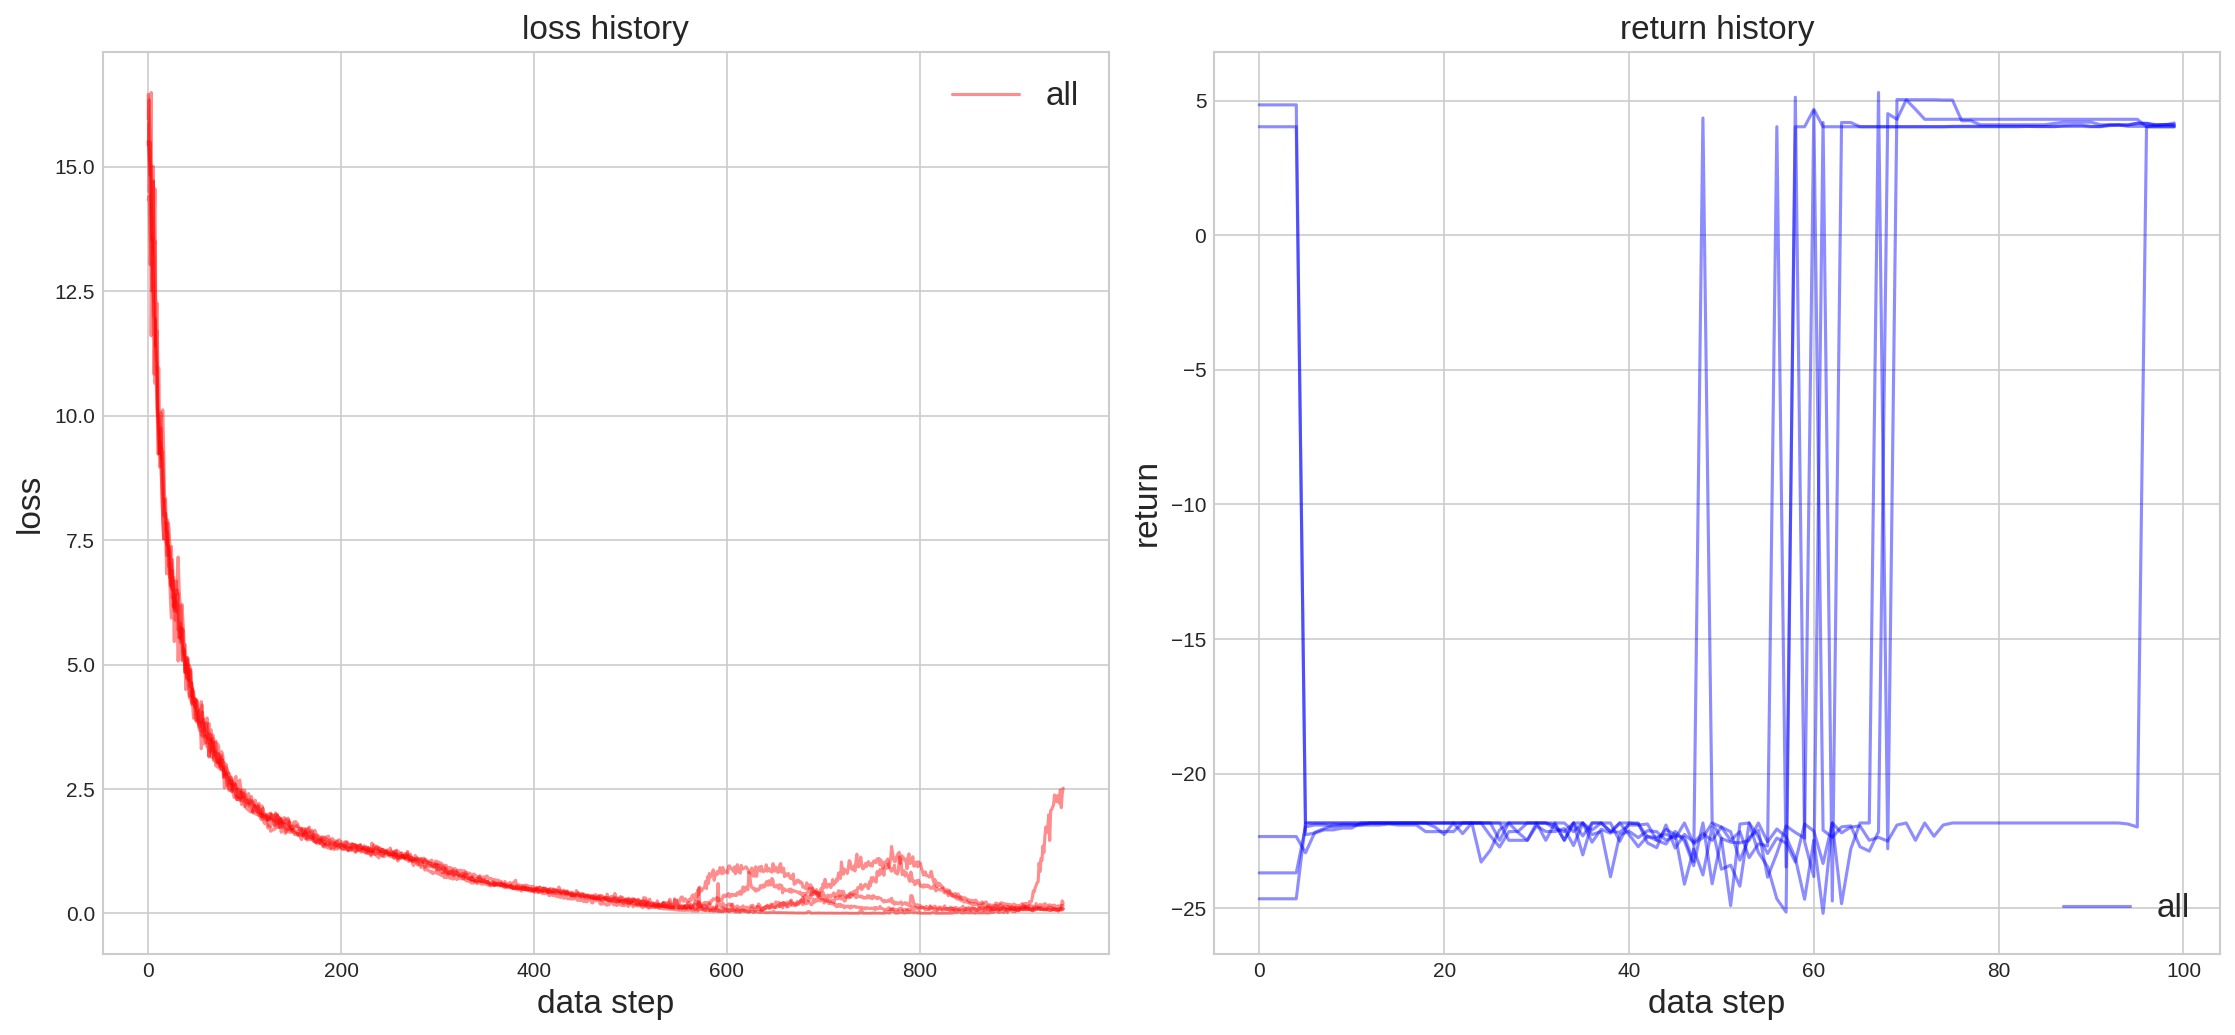

acquired action
action =  [18 18 18 18 18 18 18 18 18 18]
action =  [18 18 18 18 18 18 18 18 18 18]
action =  [18 18 18 18 18 18 18 18 18 18]
action =  [15 15 15 15 15 15 15 15 15 15]
action =  [18 18 18 18 18 18 18 18 18 18]
action =  [18 18 18 18 18 18 18 18 18 18]
action =  [18 18 18 18 18 18 18 18 18 18]
action =  [19 19 19 19 19 19 19 19 19 19]
action =  [18 18 18 18 18 18 18 18 18 18]
action =  [14 14 14 14 14 14 14 14 14 14]
return [4.174 4.174 4.174 4.174 4.174 4.174 4.174 4.174 4.174 4.174]
param distribution in model


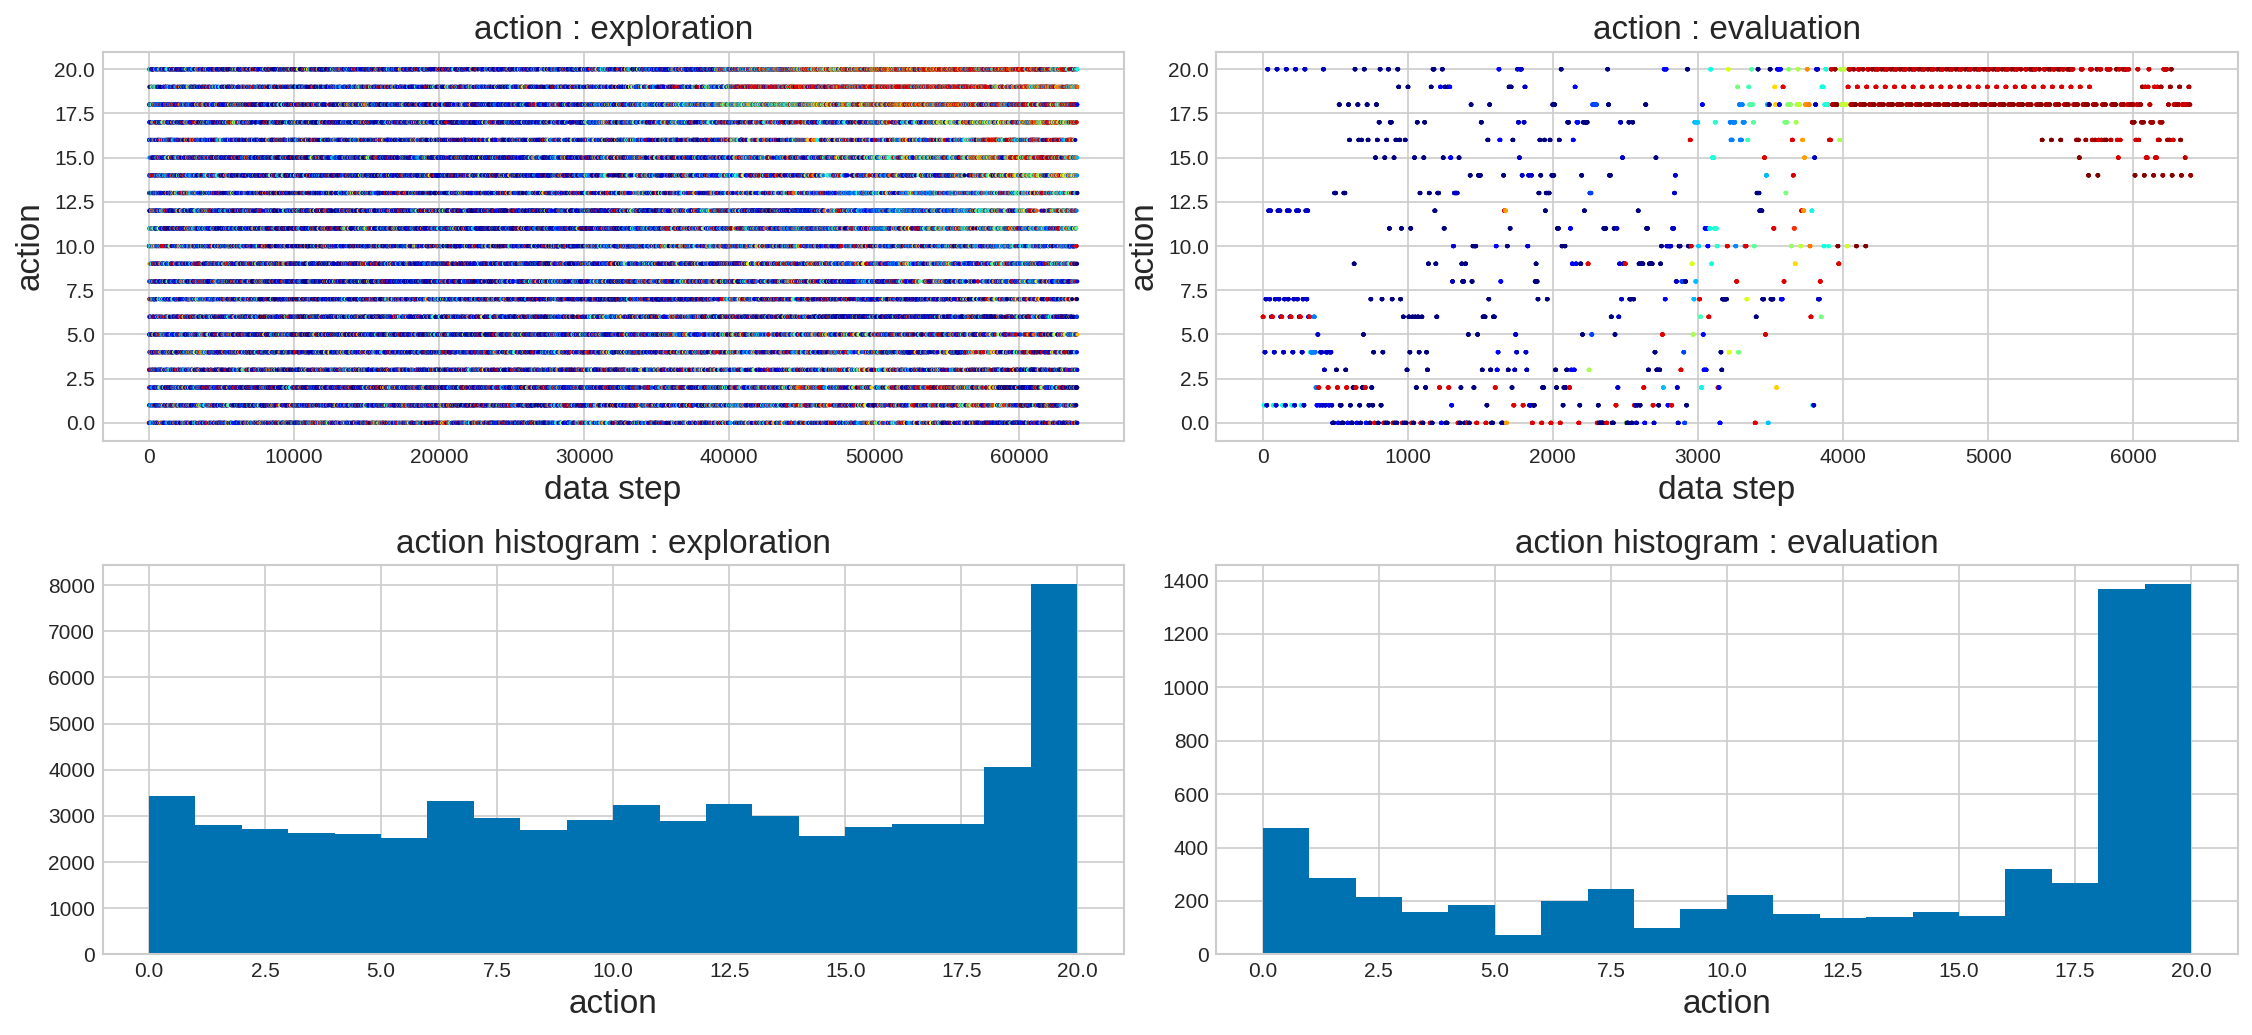

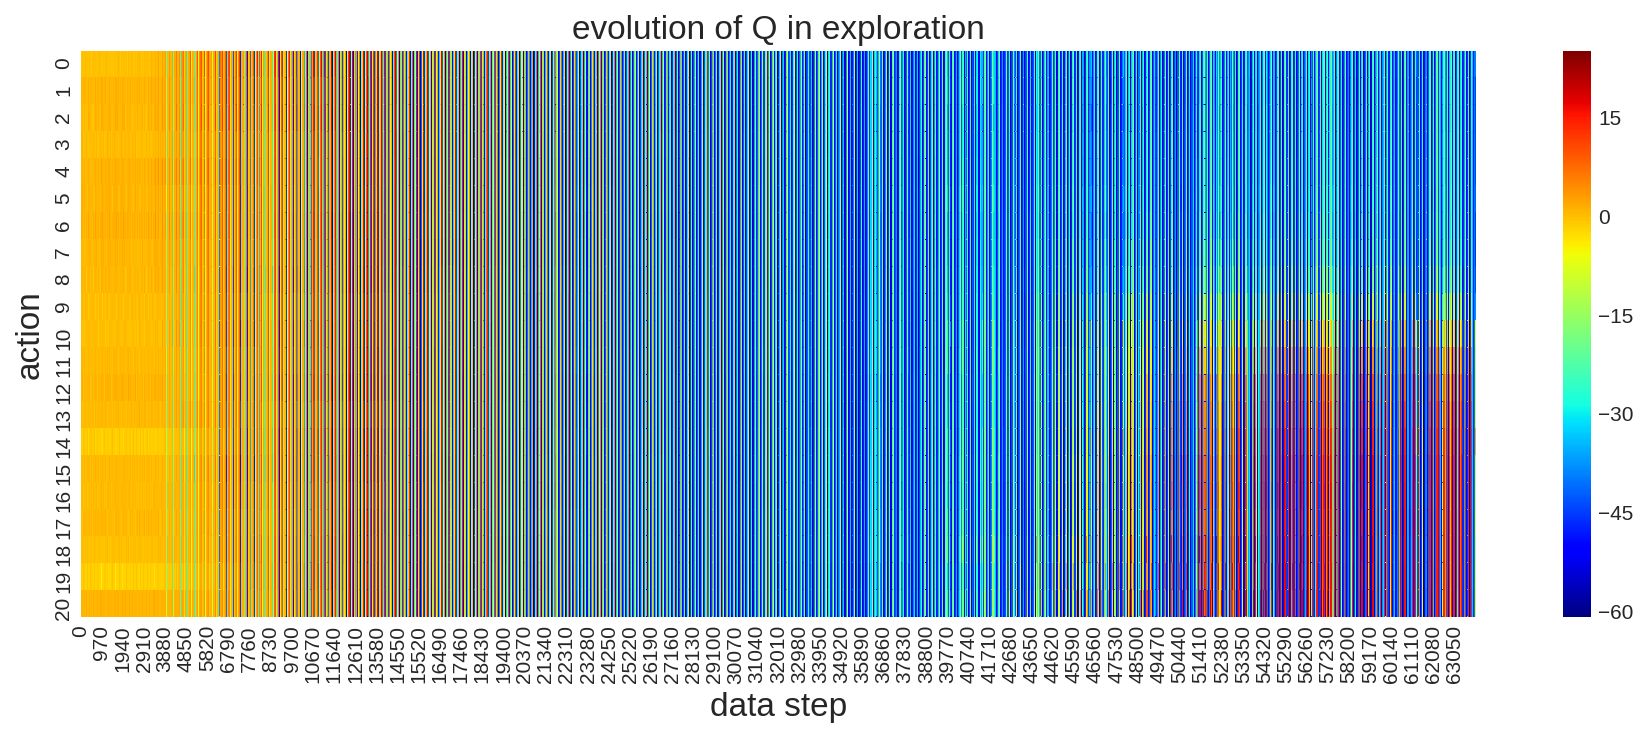

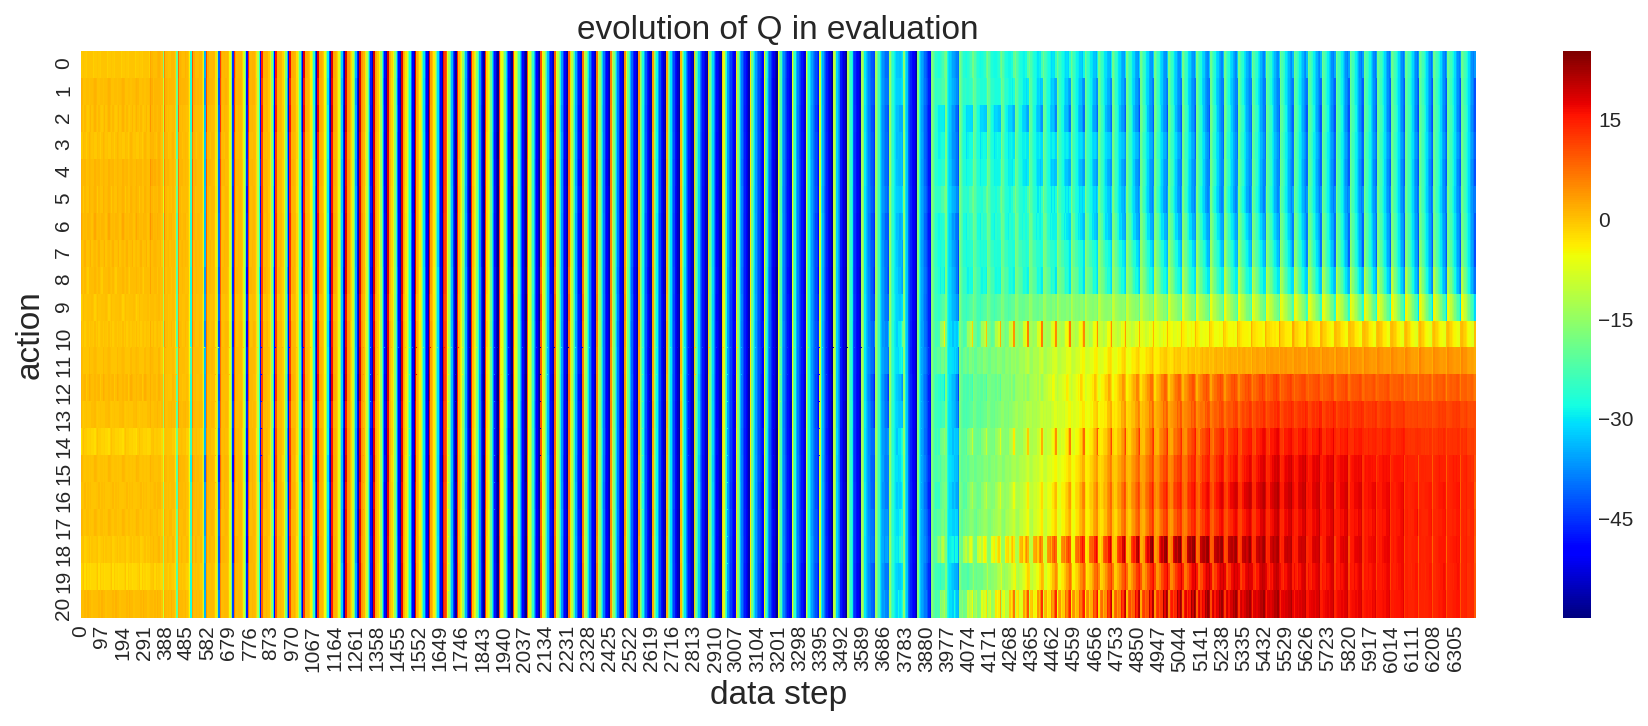

bankrupt=337461, total=352064, ratio=0.9585


In [5]:
import DQN
import importlib
importlib.reload(DQN)  # original DRL code
from keras import optimizers

model = DQN.gen_model(input_shapes=env.shapes(), n_outputs=21, \
                           hidden_dims=[128, 64, 32], reg_l1=0.0, reg_l2=0.0, 
                           duel=False, duel_value_dim=8, duel_advantage_dim=16, 
                           input_reg=False, input_min=0, input_max=1,
                           output_reg=False, output_min=0, output_max=1)

#df = pd.DataFrame()
for lr, eps, boltzmann in itertools.product([1e-3,], [0.5,], [False,]):
    print('======================================================')
    print('lr={}, eps={}, boltzmann={}'
          .format(lr, eps, boltzmann))
    
    tester = DQN.Tester(env, model)
    #n_trials = 5
    #n_steps = 10000
    tester.test(n_trials=n_trials, n_steps=n_steps,
                training_interval=10, n_batches=10, batch_size=256, alpha=1.0, 
                target_update_interval=20, doubleQ=False,
                gamma=1.0/(1+hurdle), optimizer=optimizers.Adam(lr),
                epsilon_start=1.0, epsilon_end=eps, epsilon_interval=n_steps,
                boltzmann=boltzmann, 
                verbose=False, verbose_interval=100, evaluate_interval=100, 
                get_log=True)

    viz = DQN.Visualizer()
    viz.viz_action_history(tester.trainer, lambda x:x[0], 
                           cmap='jet', alpha=1.0, s=1.0)
    viz.viz_Q_history(tester.trainer)
    
    for trial in range(n_trials):
        df_temp = pd.DataFrame(np.ravel(tester.return_histories[trial]['all']), columns=['return'])
        df_temp['trial'] = trial
        df_temp['t'] = np.arange(len(df_temp))
        #df_temp['lr'] = lr
        #df_temp['eps'] = eps
        #df_temp['boltzmann'] = boltzmann
        df_temp['Agent'] = 'DQN'

        df = pd.concat([df, df_temp])

    #ModelInspection.inspect_hidden_layers(tester.env, tester.model, tester.agent, show_hidden_hist=True)
    print('bankrupt={}, total={}, ratio={:.4f}'
      .format(env.done_bankrupt_counter, env.done_counter, env.done_bankrupt_counter/env.done_counter))
    env.done_counter = 0
    env.done_bankrupt_counter = 0

df.to_csv(tester.name + '.csv')

lr=0.01, n_advantages=10, mult_critic=0.1, mult_entropy=0.1
start testing... :  2019-11-01 23:30:51.915731
start 0/5 th trial...


100%|██████████| 10000/10000 [00:40<00:00, 248.82it/s]


start 1/5 th trial...


100%|██████████| 10000/10000 [00:41<00:00, 242.80it/s]


start 2/5 th trial...


100%|██████████| 10000/10000 [00:42<00:00, 237.56it/s]


start 3/5 th trial...


100%|██████████| 10000/10000 [00:43<00:00, 232.52it/s]


start 4/5 th trial...


100%|██████████| 10000/10000 [00:43<00:00, 227.77it/s]


end testing... :  2019-11-01 23:34:25.290620
loss and reward history


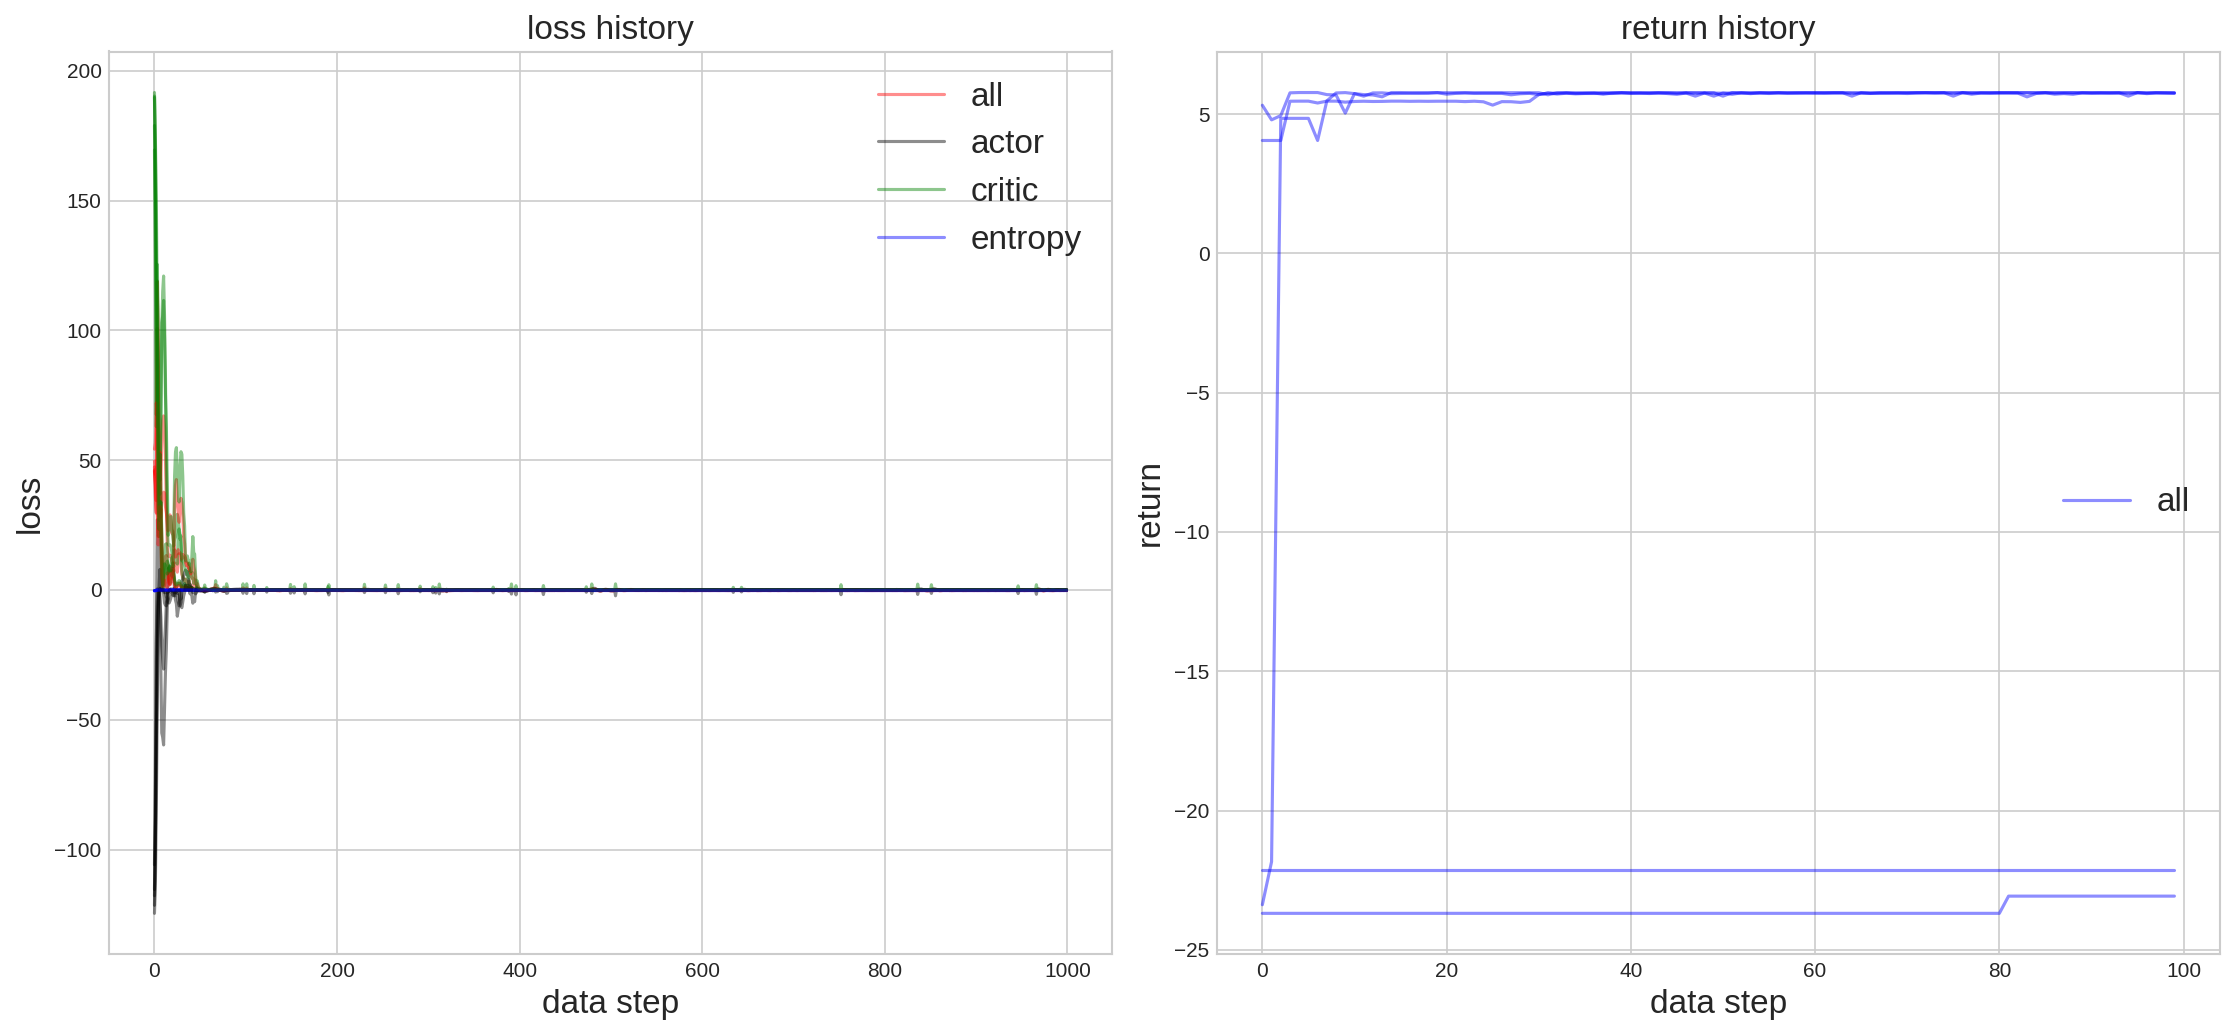

acquired action
action =  [10 10 10 10 10 10 10 10 10 10]
action =  [13 13 13 13 13 13 13 13 13 13]
action =  [10 10 10 10 10 10 10 10 10 10]
action =  [10 10 10 10 10 10 10 10 10 10]
action =  [10 10 10 10 10 10 10 10 10 10]
action =  [10 10 10 10 10 10 10 10 10 10]
action =  [13 13 13 13 13 13 13 13 13 13]
action =  [13 13 13 13 13 13 13 13 13 13]
action =  [13 13 13 13 13 13 13 13 13 13]
action =  [13 13 13 13 13 13 13 13 13 13]
return [5.742 5.742 5.742 5.742 5.742 5.742 5.742 5.742 5.742 5.742]
param distribution in model


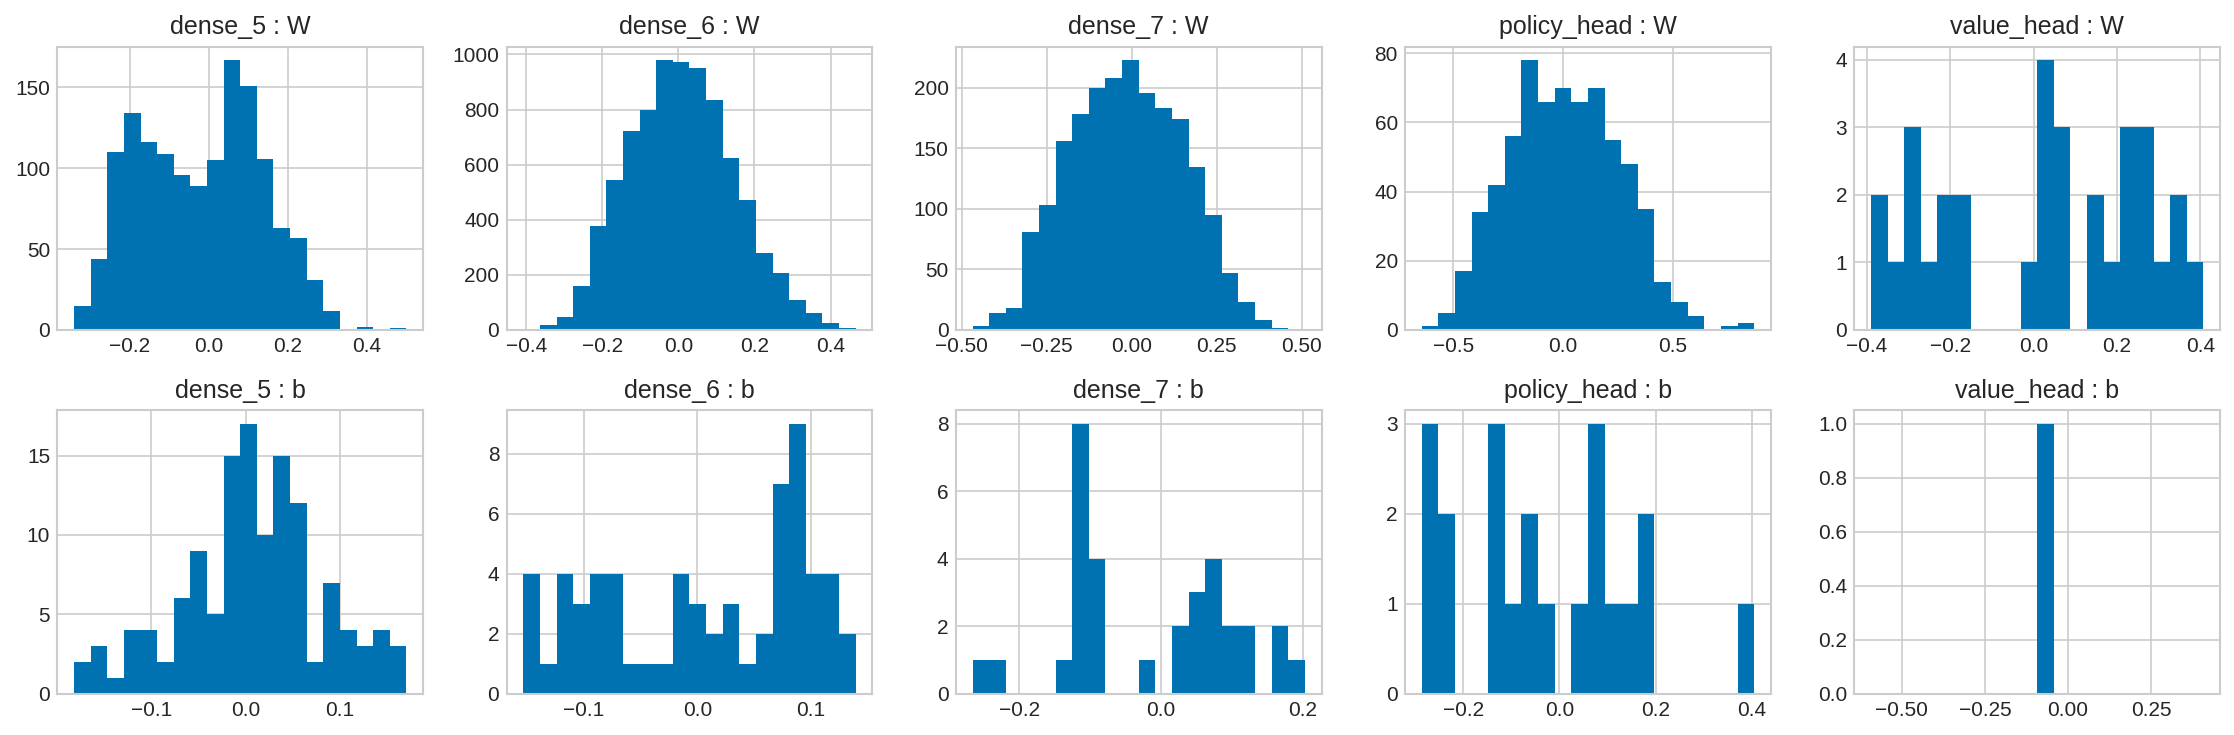

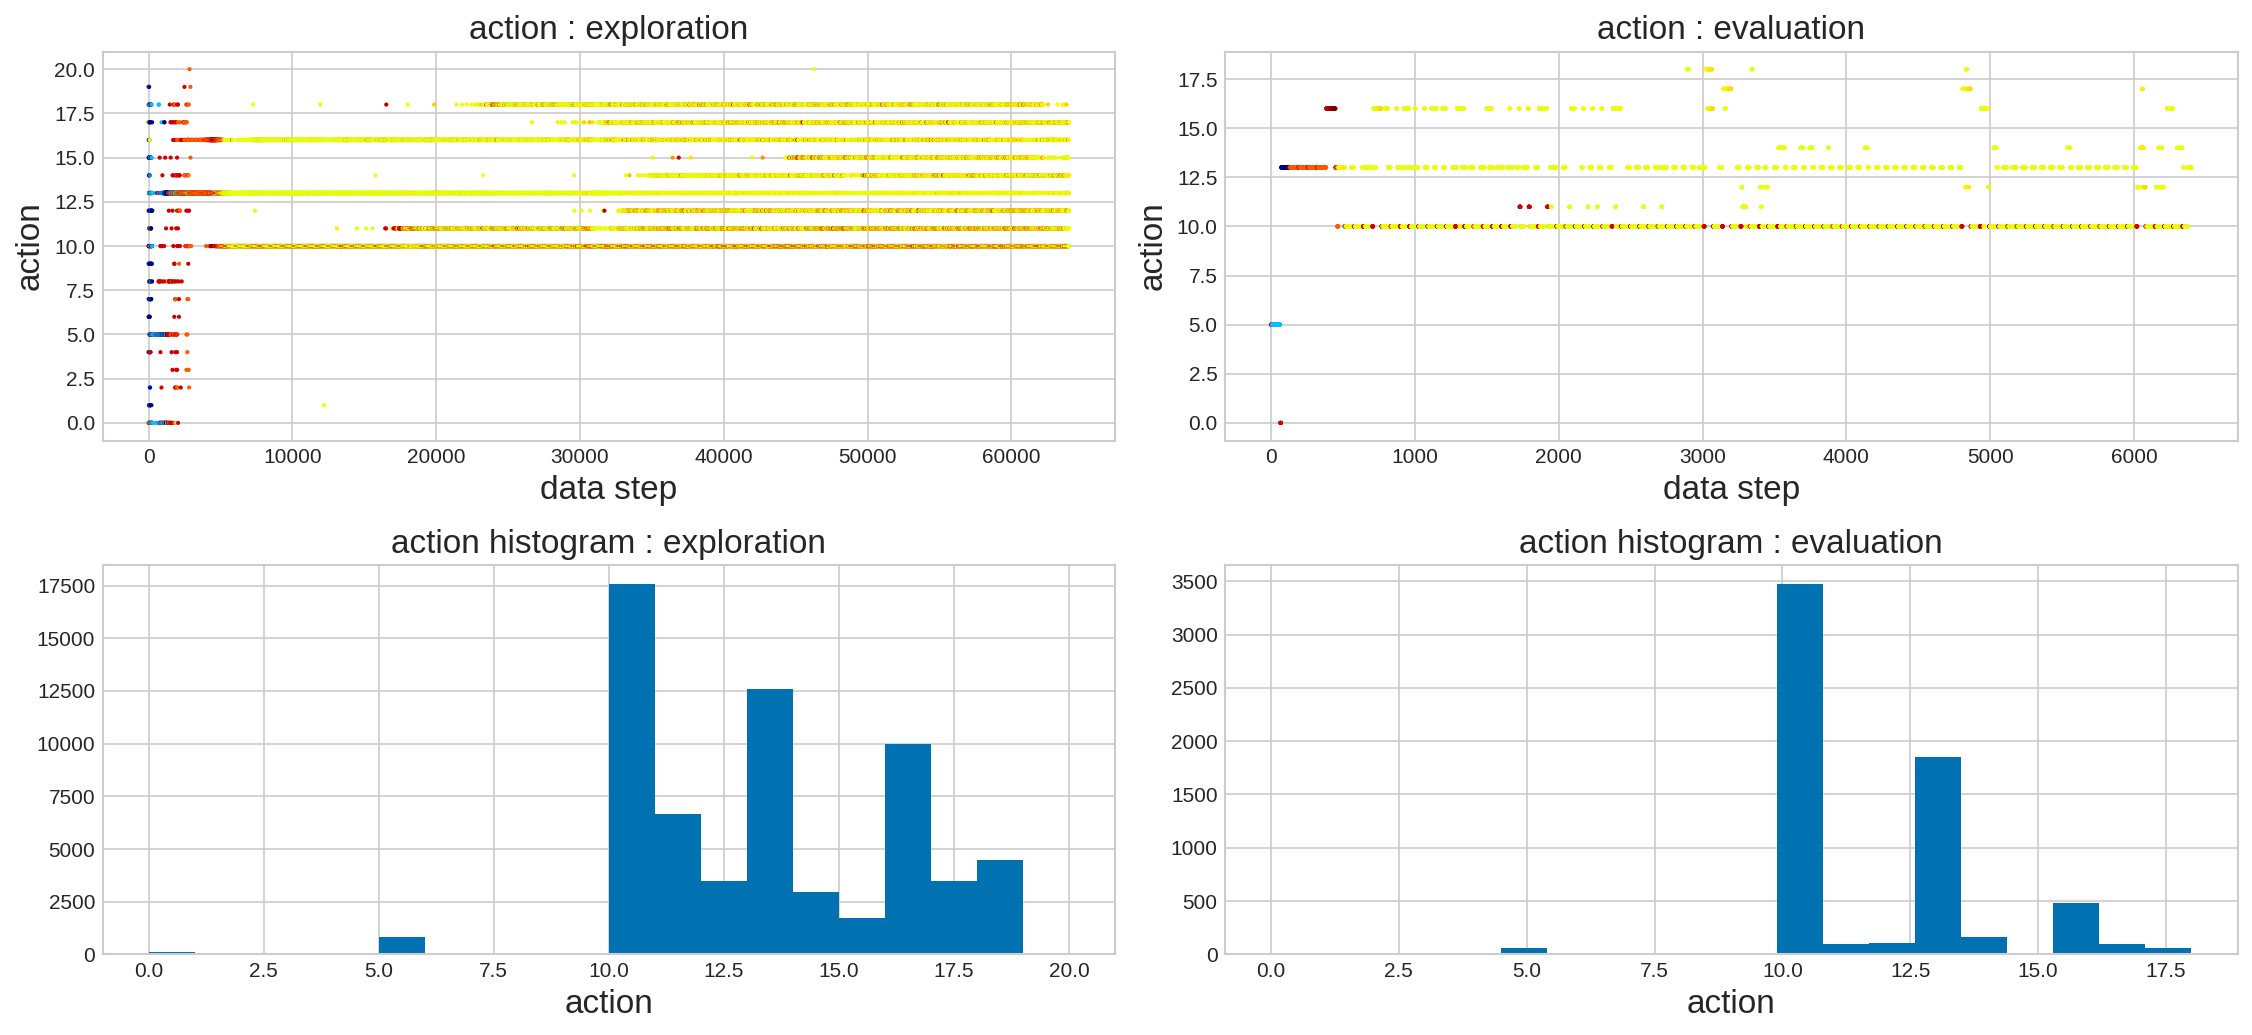

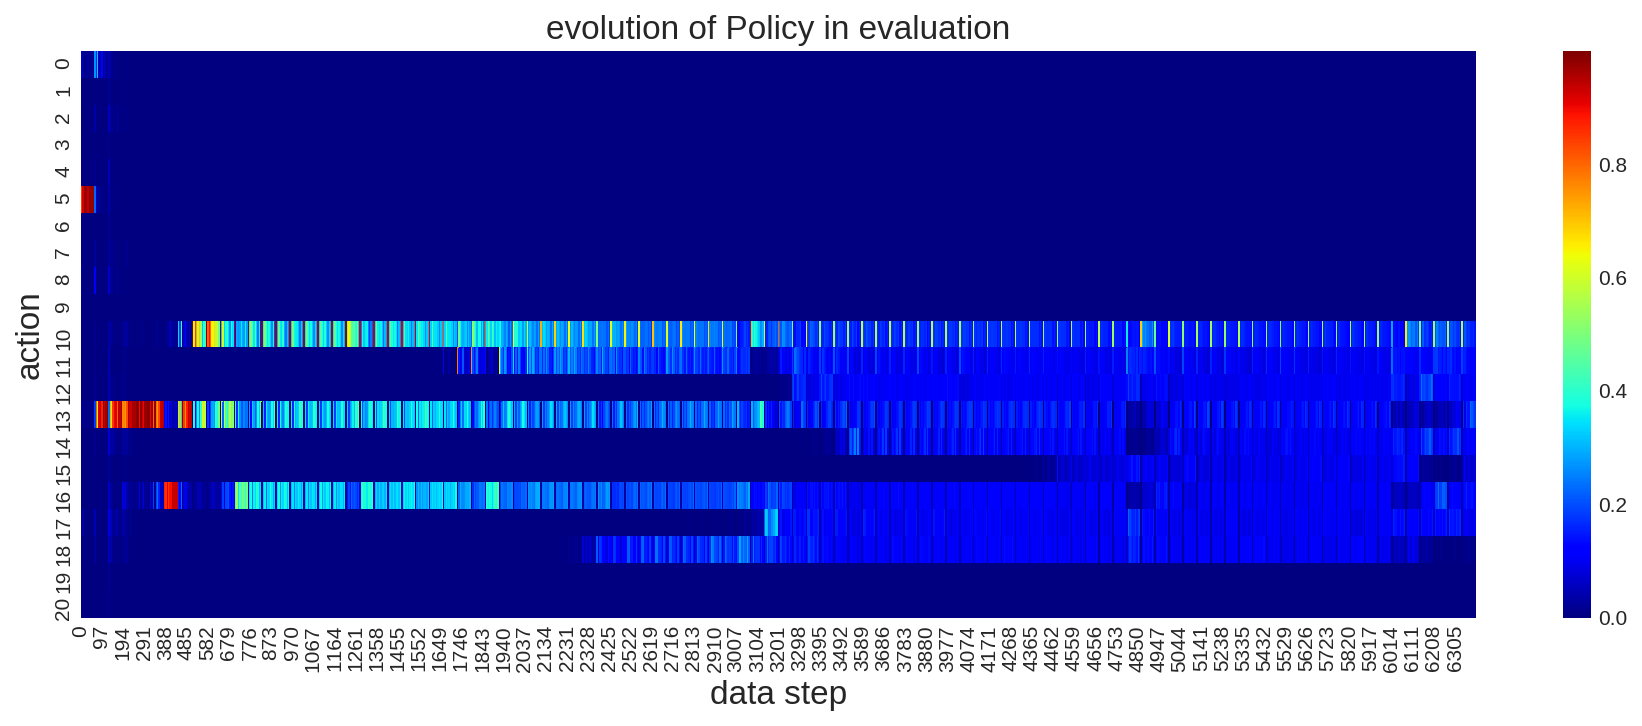

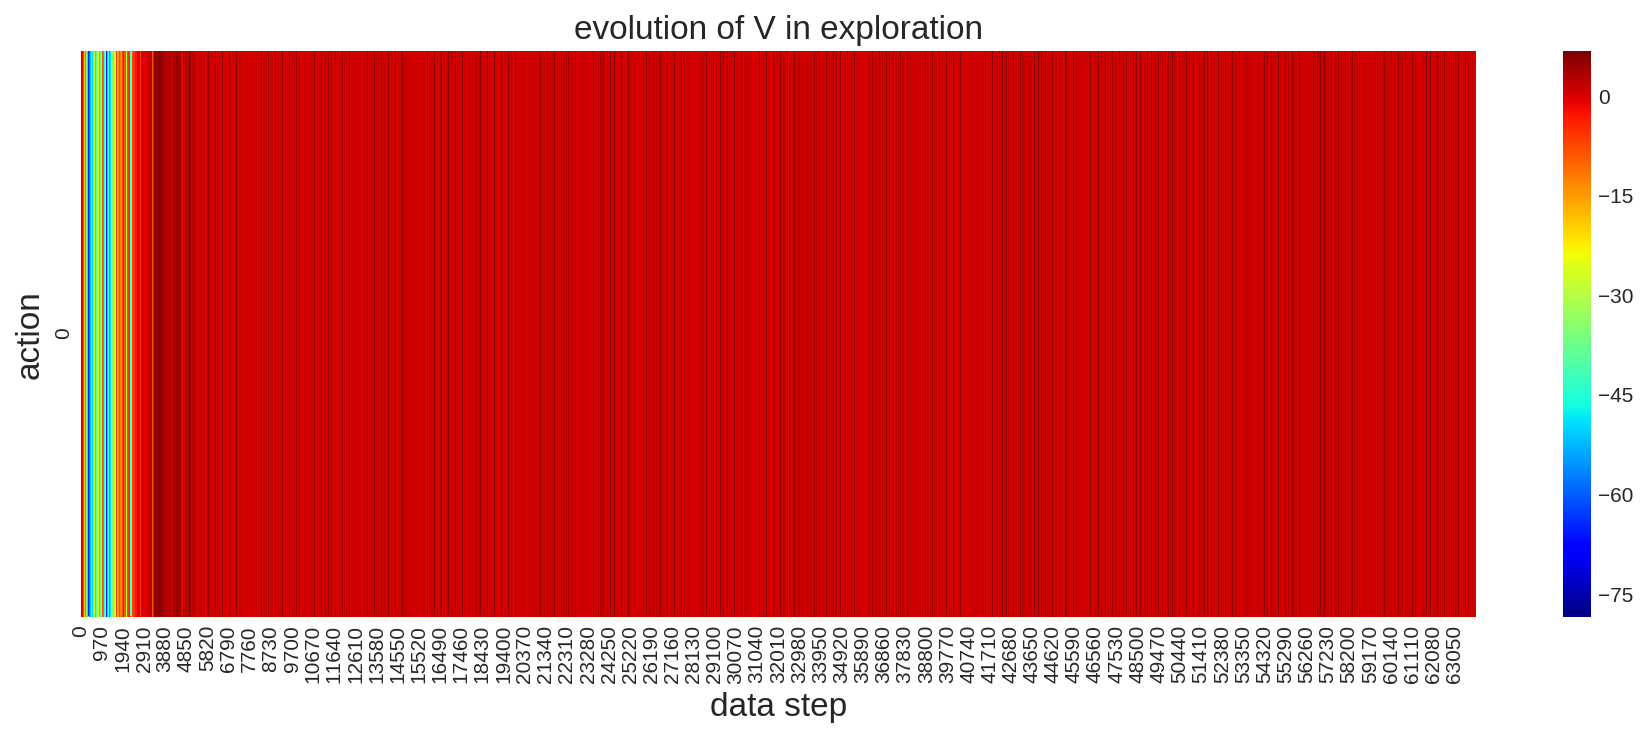

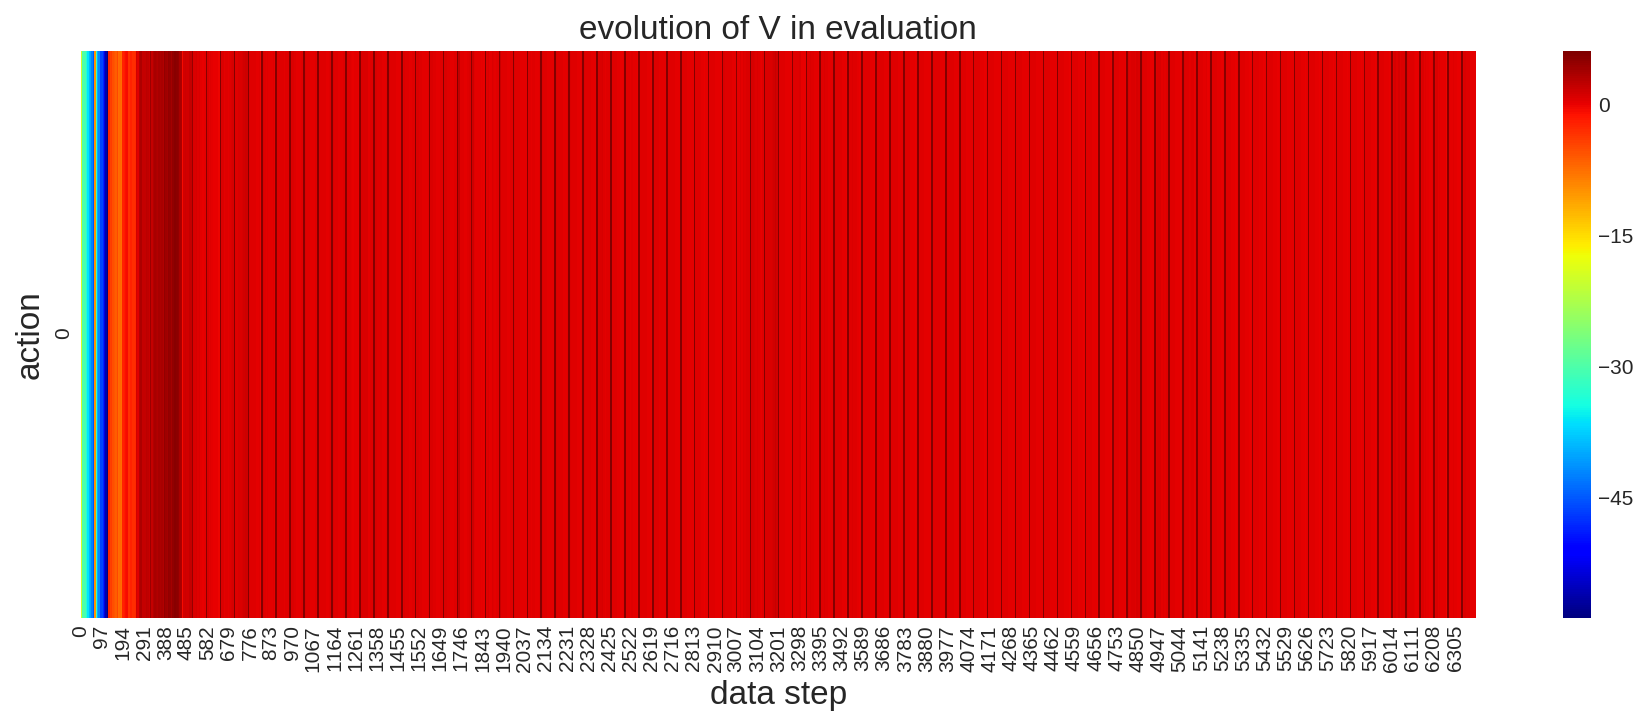

bankrupt=144540, total=352064, ratio=0.4106


In [6]:
import A2C  # original DRL code
importlib.reload(A2C)  # original DRL code
from keras import optimizers

model = A2C.gen_model(input_shapes=env.shapes(), n_outputs=21, 
                      hidden_dims=[128, 64, 32])

#df = pd.DataFrame()
for lr, n_advantages, mult_critic, mult_entropy in itertools.product(
    [1e-2,], [10,], [0.1,], [0.1,]):
    print('======================================================')
    print('lr={}, n_advantages={}, mult_critic={}, mult_entropy={}'
          .format(lr, n_advantages, mult_critic, mult_entropy))
    
    tester = A2C.Tester(env, model)
    #n_trials = 5
    #n_steps = 10000
    tester.test(n_trials=n_trials, n_steps=n_steps, n_advantages=n_advantages,
               gamma=1.0/(1+hurdle), optimizer=optimizers.Adam(lr=lr),
               mult_actor=1.0, mult_critic=mult_critic, mult_entropy=mult_entropy,
               verbose=False, verbose_interval=100, evaluate_interval=100, 
               get_log=True)

    viz = A2C.Visualizer()
    viz.viz_action_history(tester.trainer, lambda x:x[0], 
                           cmap='jet', alpha=1.0, s=1.0)
    viz.viz_P_history(tester.trainer)
    viz.viz_V_history(tester.trainer)

    for trial in range(n_trials):
        df_temp = pd.DataFrame(np.ravel(tester.return_histories[trial]['all']), columns=['return'])
        df_temp['trial'] = trial
        df_temp['t'] = np.arange(len(df_temp))
        #df_temp['lr'] = lr
        #f_temp['n_advantages'] = n_advantages
        #df_temp['mult_critic'] = mult_critic
        #df_temp['mult_entropy'] = mult_entropy
        df_temp['Agent'] = 'A2C_discrete'

        df = pd.concat([df, df_temp])

    #ModelInspection.inspect_hidden_layers(tester.env, tester.model, tester.agent, show_hidden_hist=True)
    print('bankrupt={}, total={}, ratio={:.4f}'
      .format(env.done_bankrupt_counter, env.done_counter, env.done_bankrupt_counter/env.done_counter))
    env.done_counter = 0
    env.done_bankrupt_counter = 0
    
df.to_csv(tester.name + '.csv')

In [7]:
mu_min = 0.0
mu_max = 20.0

lr=0.001, n_advantages=10, mult_critic=0.1, mult_entropy=0.01
start testing... :  2019-11-01 23:34:38.190188
start 0/5 th trial...


  0%|          | 1/10000 [00:00<1:22:20,  2.02it/s]W1101 23:34:39.675616 140589070145344 deprecation.py:323] From /home/deepstation/.pyenv/versions/anaconda3-5.0.1/envs/ForChainer/lib/python3.6/site-packages/tensorflow/python/ops/math_grad.py:1205: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
100%|██████████| 10000/10000 [00:30<00:00, 328.32it/s]


start 1/5 th trial...


100%|██████████| 10000/10000 [00:31<00:00, 329.46it/s]


start 2/5 th trial...


100%|██████████| 10000/10000 [00:32<00:00, 306.17it/s]


start 3/5 th trial...


100%|██████████| 10000/10000 [00:33<00:00, 295.27it/s]


start 4/5 th trial...


100%|██████████| 10000/10000 [00:35<00:00, 292.38it/s]


end testing... :  2019-11-01 23:37:26.583375
loss and reward history


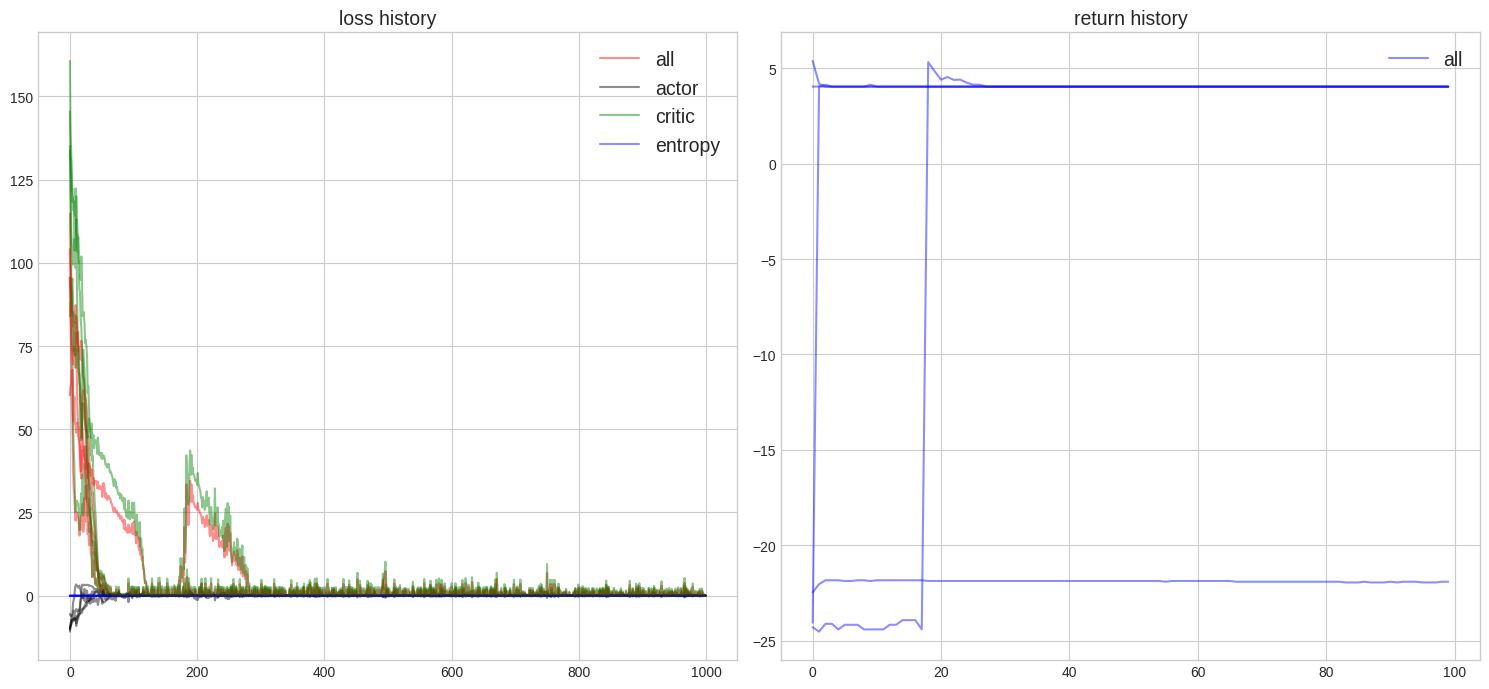

acquired action
action =  [19.832 19.832 19.832 19.832 19.832 19.832 19.832 19.832 19.832 19.832]
action =  [19.707 19.707 19.707 19.707 19.707 19.707 19.707 19.707 19.707 19.707]
action =  [19.863 19.863 19.863 19.863 19.863 19.863 19.863 19.863 19.863 19.863]
action =  [19.633 19.633 19.633 19.633 19.633 19.633 19.633 19.633 19.633 19.633]
action =  [19.88 19.88 19.88 19.88 19.88 19.88 19.88 19.88 19.88 19.88]
action =  [19.865 19.865 19.865 19.865 19.865 19.865 19.865 19.865 19.865 19.865]
action =  [19.883 19.883 19.883 19.883 19.883 19.883 19.883 19.883 19.883 19.883]
action =  [19.925 19.925 19.925 19.925 19.925 19.925 19.925 19.925 19.925 19.925]
action =  [19.936 19.936 19.936 19.936 19.936 19.936 19.936 19.936 19.936 19.936]
action =  [19.954 19.954 19.954 19.954 19.954 19.954 19.954 19.954 19.954 19.954]
return [4.033 4.033 4.033 4.033 4.033 4.033 4.033 4.033 4.033 4.033]
param distribution in model


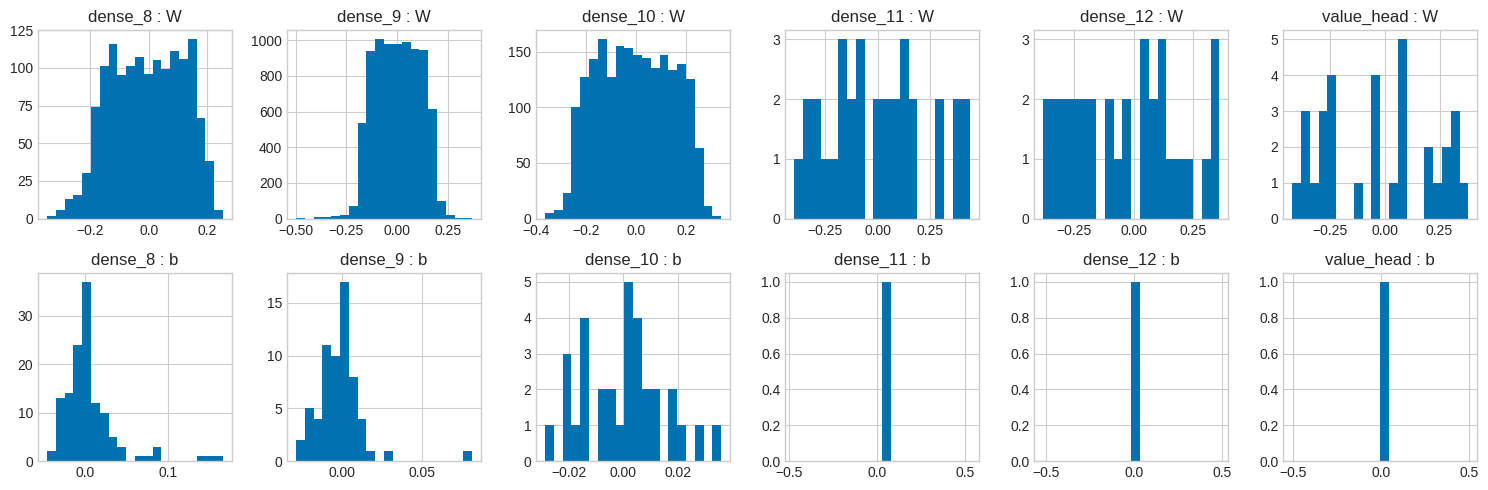

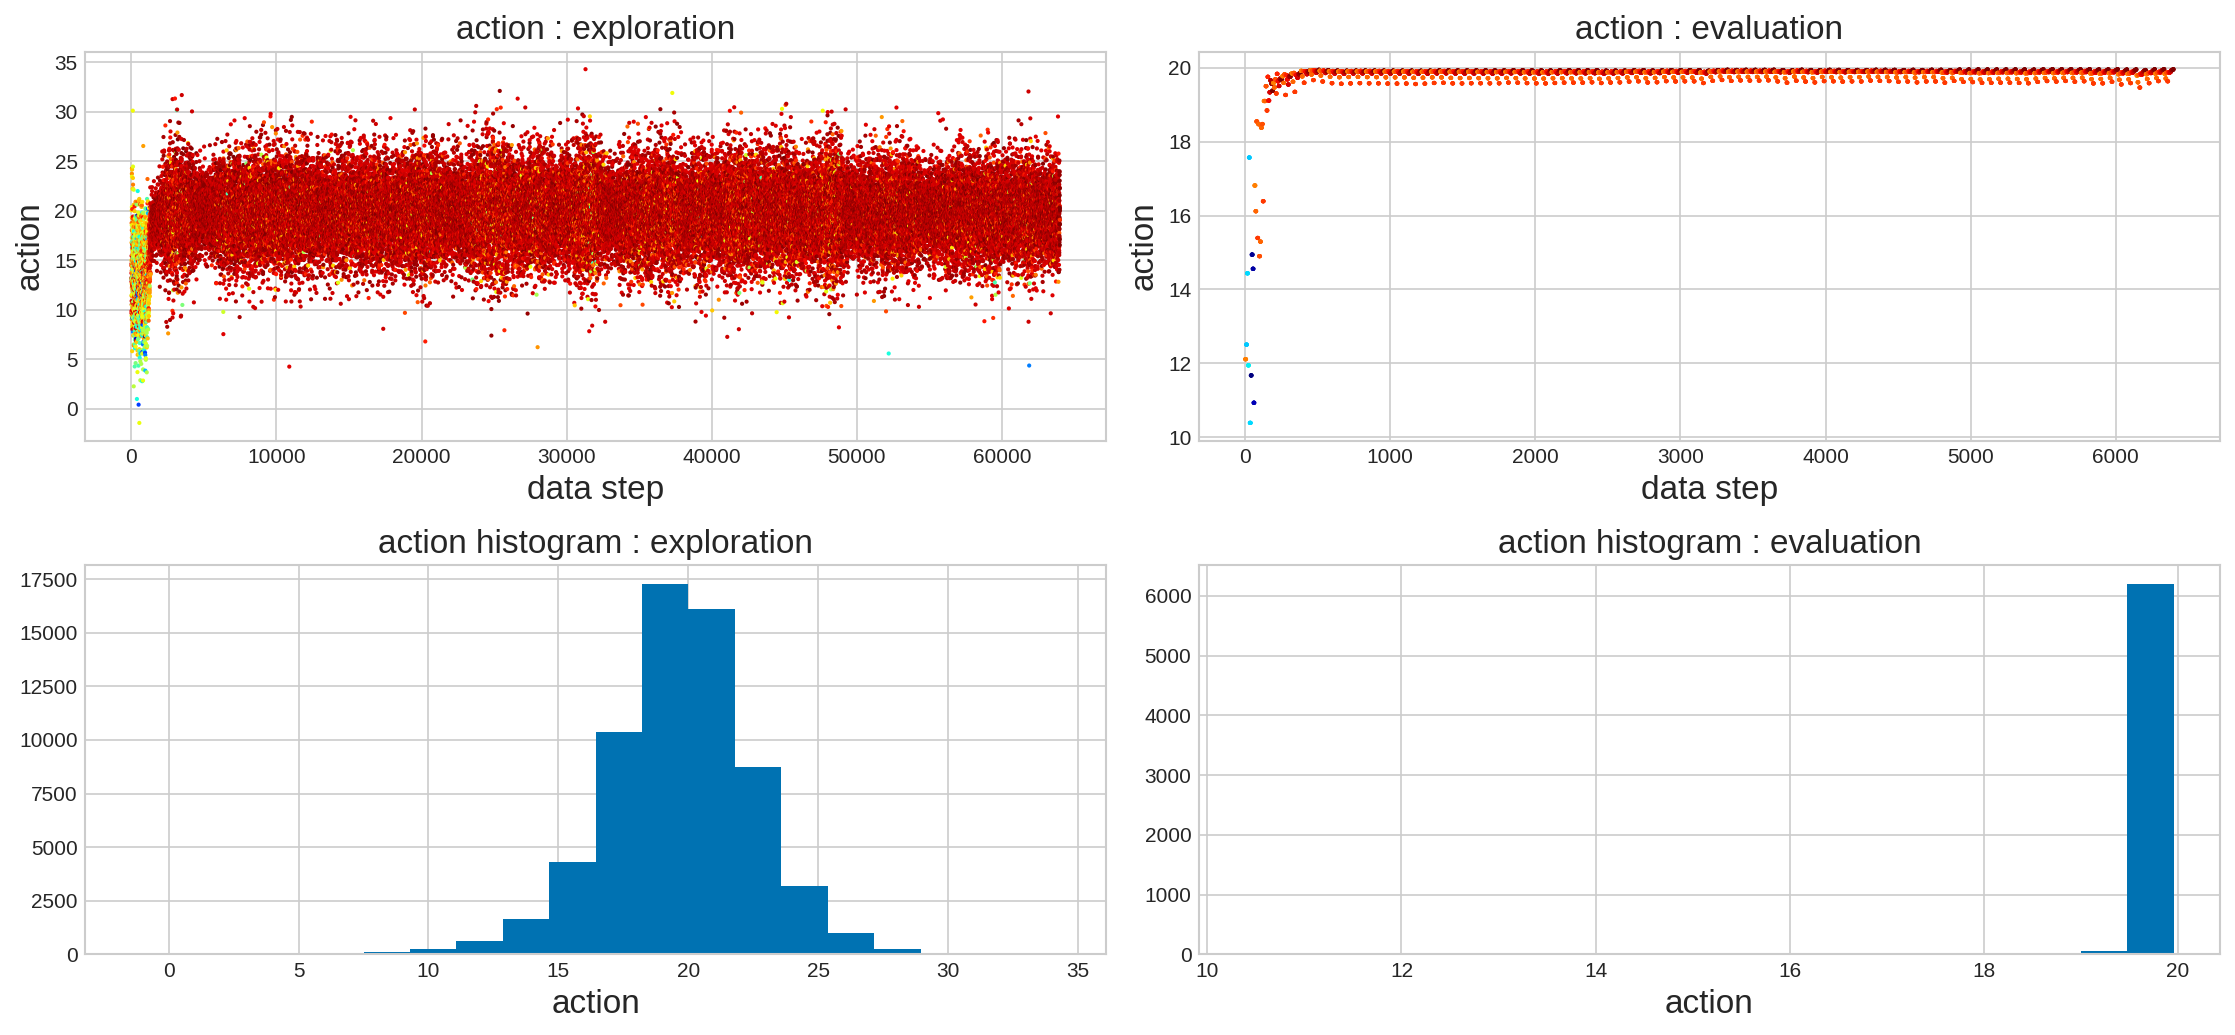

bankrupt=101785, total=362277, ratio=0.2810


In [8]:
import importlib
import A2C_continuous
importlib.reload(A2C_continuous)  # original DRL code

from keras import optimizers

mu_min = mu_min
mu_max = mu_max
sigma_max = (mu_max - mu_min) / 3

model = A2C_continuous.gen_model(input_shapes=env.shapes(), n_outputs=1, \
                                 hidden_dims=[128, 64, 32], reg_l1=0.0, reg_l2=0.0, \
                                mu_min=mu_min, mu_max=mu_max, 
                                va_min=(0.001)**2, va_max=sigma_max**2, 
                                input_reg=False, input_min=0, input_max=1)

#df = pd.DataFrame()
for lr, n_advantages, mult_critic, mult_entropy in itertools.product(
    [1e-3,], [10,], [0.1,], [0.01,]):
    print('======================================================')
    print('lr={}, n_advantages={}, mult_critic={}, mult_entropy={}'
          .format(lr, n_advantages, mult_critic, mult_entropy))
    
    tester = A2C_continuous.Tester(env, model, val_min=mu_min-3*sigma_max, val_max=mu_max+3*sigma_max)
    #n_trials = 5
    #n_steps = 10000
    tester.test(n_trials=n_trials, n_steps=n_steps, n_advantages=n_advantages,
               gamma=1.0/(1+hurdle), optimizer=optimizers.Adam(lr=lr),
               mult_actor=0.1, mult_critic=mult_critic, mult_entropy=mult_entropy,
               verbose=False, verbose_interval=100, evaluate_interval=100, 
               get_log=True)

    viz = A2C_continuous.Visualizer()
    viz.viz_action_history(tester.trainer, state_valuation=lambda x:x[0], action_valuation=lambda x:x, 
                           cmap='jet', alpha=1.0, s=1.0)

    for trial in range(n_trials):
        df_temp = pd.DataFrame(np.ravel(tester.return_histories[trial]['all']), columns=['return'])
        df_temp['trial'] = trial
        df_temp['t'] = np.arange(len(df_temp))
        #df_temp['lr'] = lr
        #df_temp['n_advantages'] = n_advantages
        #df_temp['mult_critic'] = mult_critic
        #df_temp['mult_entropy'] = mult_entropy
        df_temp['Agent'] = 'A2C_continuous'

        df = pd.concat([df, df_temp])

    #ModelInspection.inspect_hidden_layers(tester.env, tester.model, tester.agent, show_hidden_hist=True)
    print('bankrupt={}, total={}, ratio={:.4f}'
      .format(env.done_bankrupt_counter, env.done_counter, env.done_bankrupt_counter/env.done_counter))
    env.done_counter = 0
    env.done_bankrupt_counter = 0

df.to_csv(tester.name + '.csv')

lr_p=0.0001, lr_v=0.001, boltzmann=False, sigma_end=1.0, tau_end=10
start testing... :  2019-11-01 23:37:32.176566
start 0/5 th trial...


100%|██████████| 10000/10000 [04:05<00:00, 26.79it/s]


start 1/5 th trial...


100%|██████████| 10000/10000 [04:14<00:00, 25.94it/s]


start 2/5 th trial...


100%|██████████| 10000/10000 [04:22<00:00, 25.11it/s]


start 3/5 th trial...


100%|██████████| 10000/10000 [04:29<00:00, 37.05it/s]


start 4/5 th trial...


100%|██████████| 10000/10000 [04:36<00:00, 36.15it/s]


end testing... :  2019-11-01 23:59:41.090112
loss and reward history


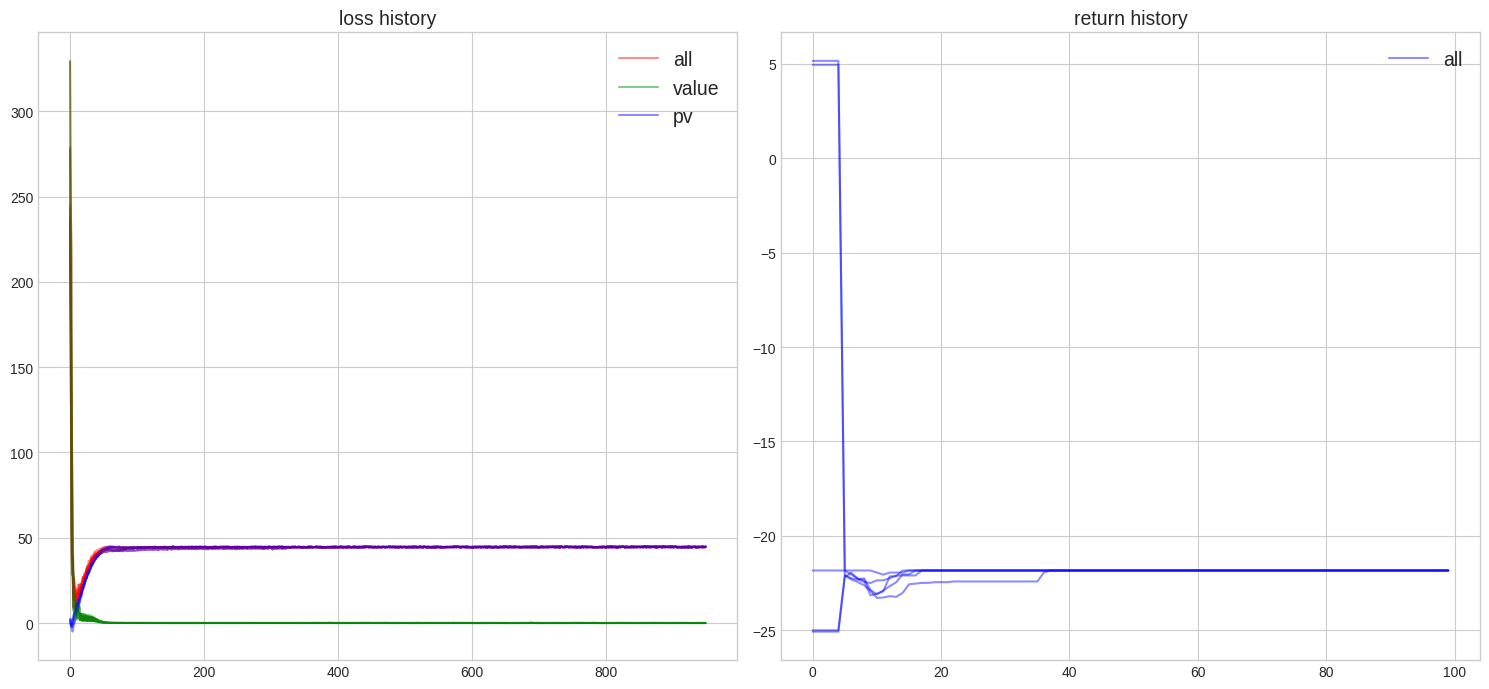

acquired action
action =  [0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
action =  [19.605 19.605 19.605 19.605 19.605 19.605 19.605 19.605 19.605 19.605]
action =  [18.093 18.093 18.093 18.093 18.093 18.093 18.093 18.093 18.093 18.093]
action =  [0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002]
action =  [8.979 8.979 8.979 8.979 8.979 8.979 8.979 8.979 8.979 8.979]
action =  [0.41 0.41 0.41 0.41 0.41 0.41 0.41 0.41 0.41 0.41]
action =  [0.394 0.394 0.394 0.394 0.394 0.394 0.394 0.394 0.394 0.394]
action =  [0.339 0.339 0.339 0.339 0.339 0.339 0.339 0.339 0.339 0.339]
action =  [0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001 0.001]
action =  [17.003 17.003 17.003 17.003 17.003 17.003 17.003 17.003 17.003 17.003]
return [-21.835 -21.835 -21.835 -21.835 -21.835 -21.835 -21.835 -21.835 -21.835
 -21.835]
param distribution in model_policy


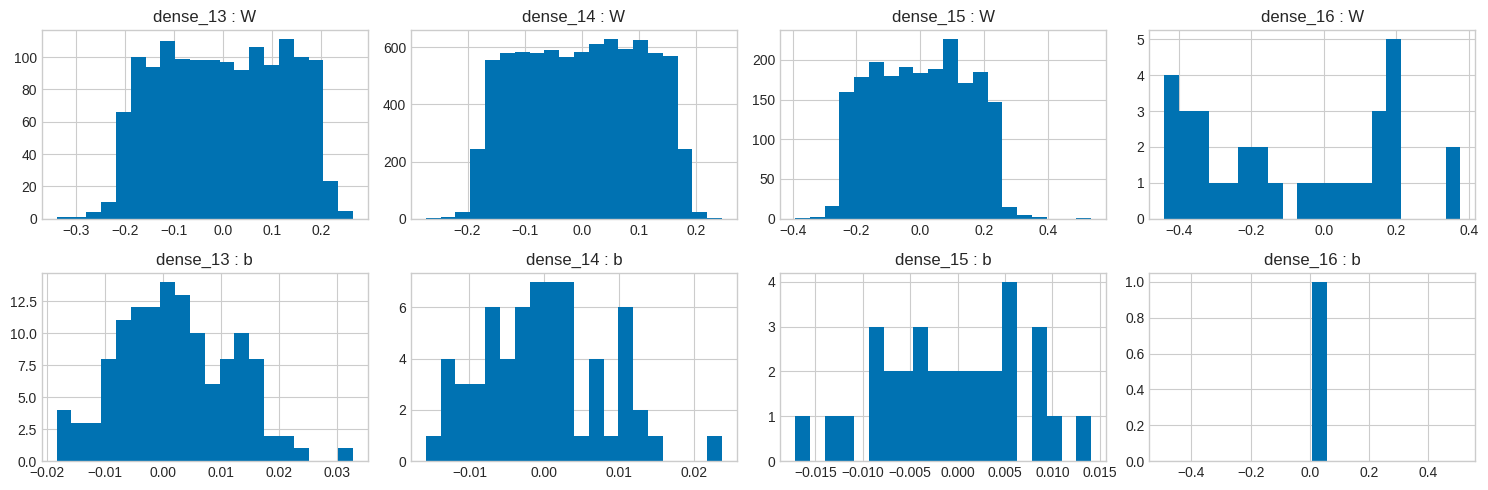

param distribution in model_value


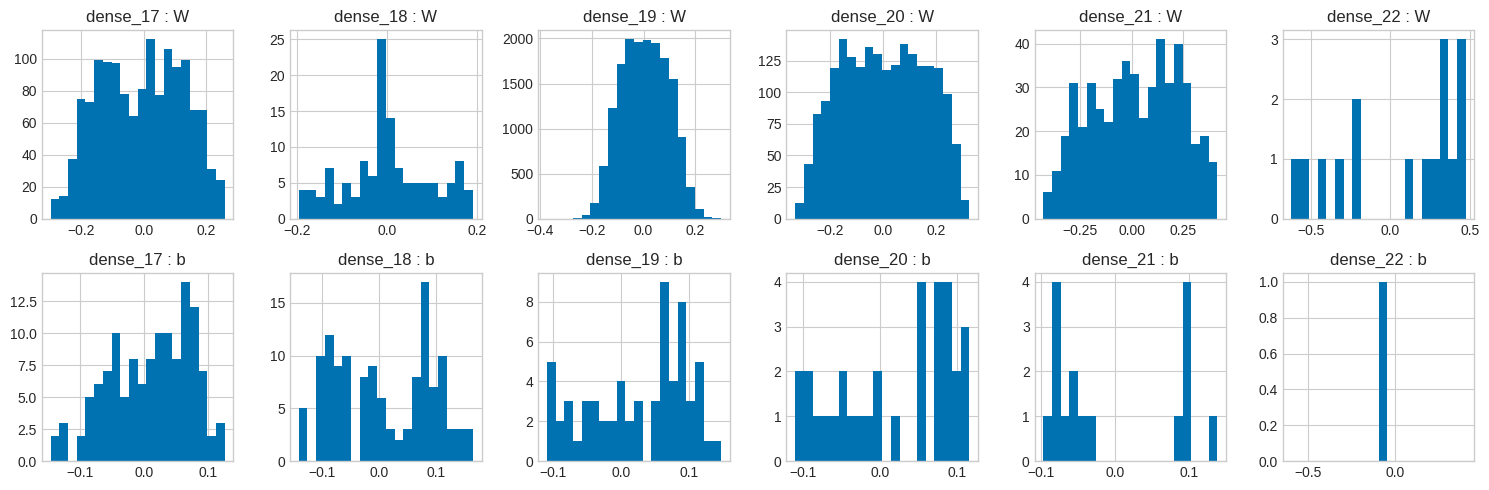

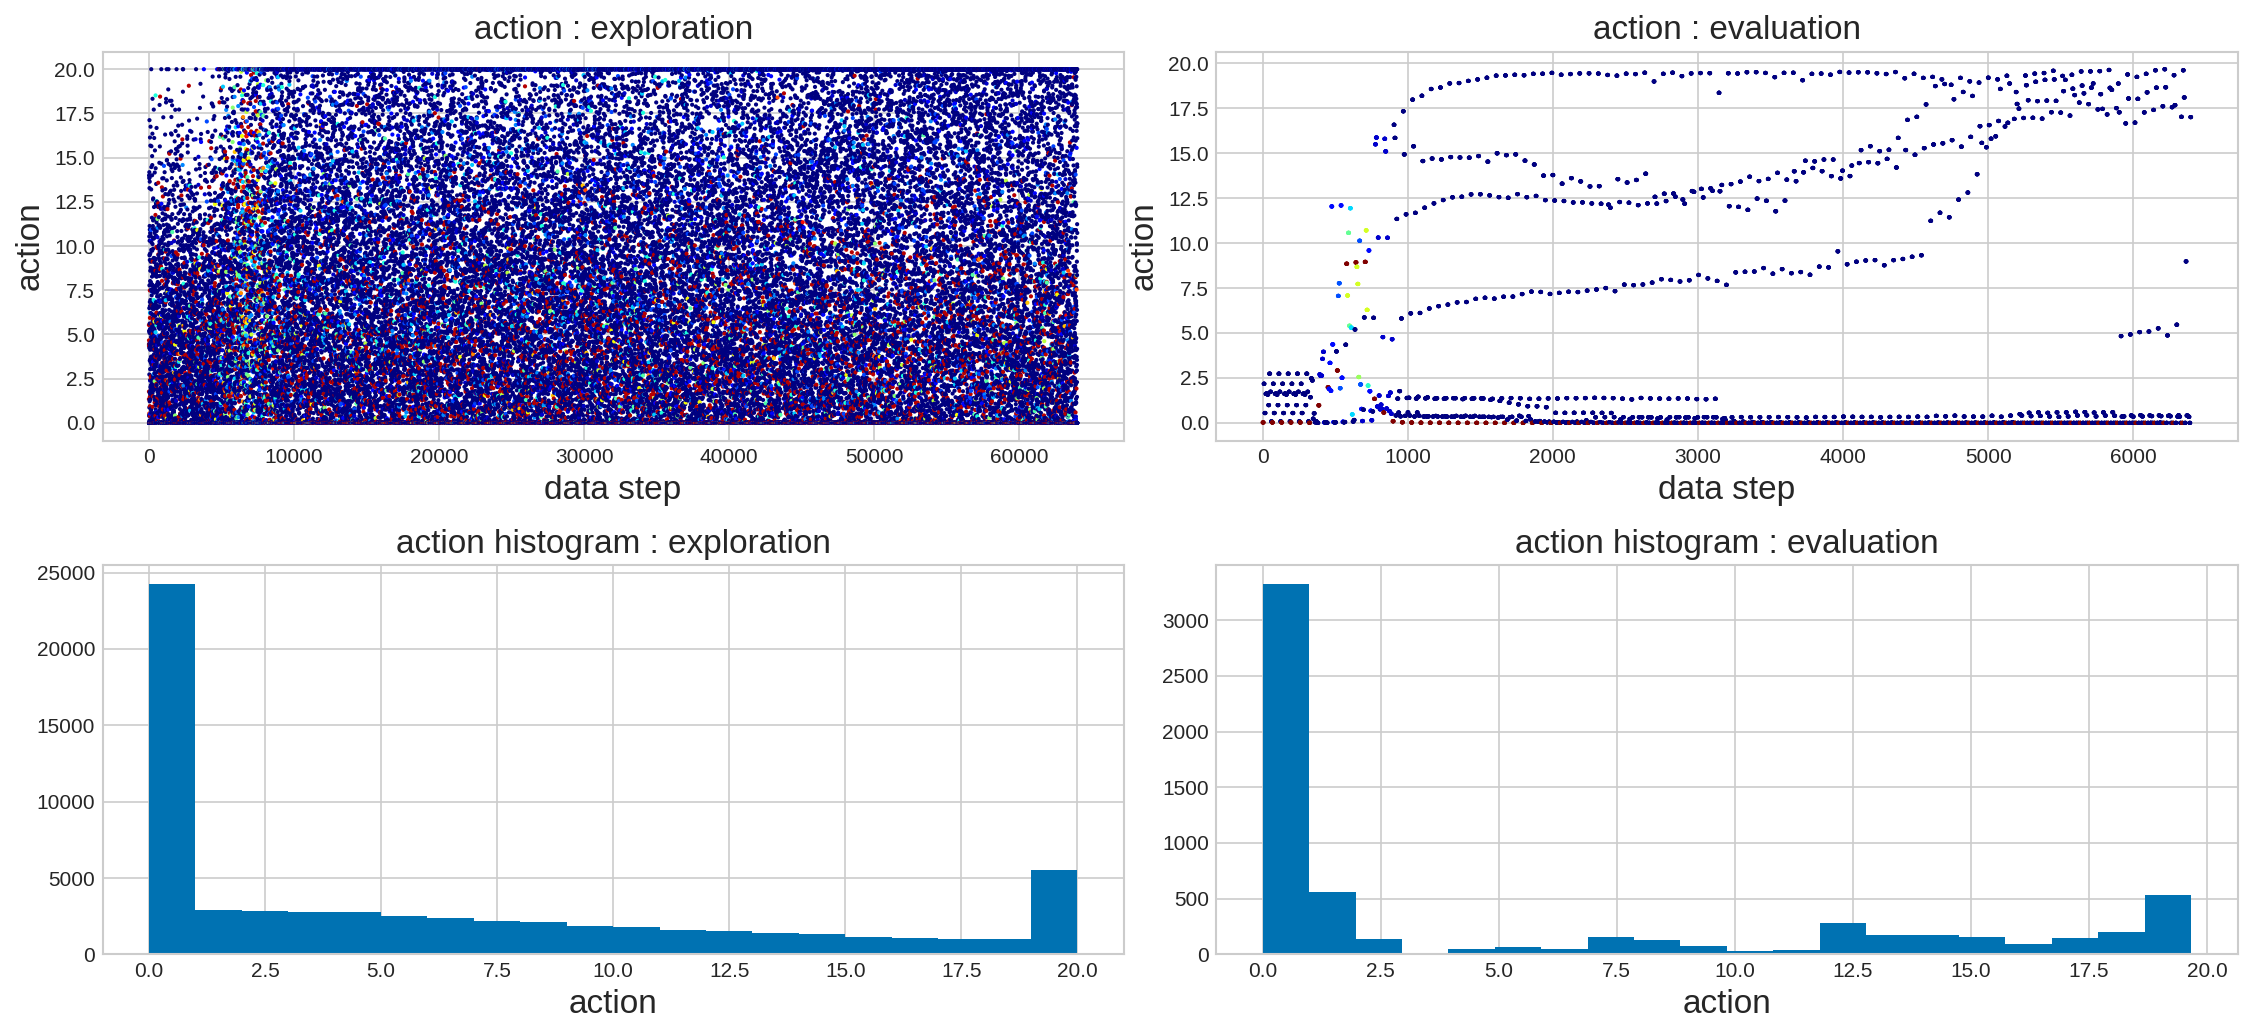

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.


bankrupt=350538, total=352064, ratio=0.9957


In [9]:
import DDPG  # original DRL code
importlib.reload(DDPG)
from keras import optimizers

action_min = mu_min
action_max = mu_max
sigma_max = (action_max - action_min) / 3

model_policy = DDPG.gen_model_policy(state_shapes=env.shapes(), n_actions=1, 
                                     hidden_dims=[128, 64, 32], 
                                     reg_l1=0.0, reg_l2=0.0, 
                                     action_min=action_min, action_max=action_max, 
                                     batch_norm_input=False, 
                                     state_reg=False, state_min=0, state_max=10)

model_value = DDPG.gen_model_value(state_shapes=env.shapes(), n_actions=1, \
                                   hidden_action_dims=[128,], 
                                   hidden_state_dims=[128,],
                                   hidden_dims=[64, 32, 16],
                                   reg_l1=0.0, reg_l2=0.0,
                                   batch_norm_state_hidden=False)


#df = pd.DataFrame()
for lr_p, lr_v, boltzmann, sigma_end, tau_end in itertools.product(
    [1e-4,], [1e-3,], [False,], [1.0,], [10,]):
    print('======================================================')
    print('lr_p={}, lr_v={}, boltzmann={}, sigma_end={}, tau_end={}'
          .format(lr_p, lr_v, boltzmann, sigma_end, tau_end))
    
    tester = DDPG.Tester(env, model_policy, model_value, val_min=action_min, val_max=action_max)
    #n_trials = 5
    #n_steps = 10000
    tester.test(n_trials=n_trials,
                gamma=1.0/(1+hurdle),
                n_steps=n_steps, training_interval=10, n_batches=10, batch_size=256,
                target_update_interval_policy=20, target_update_interval_value=20,
                tau_policy=0.5, tau_value=0.5,
                optimizer_pv=optimizers.Adam(lr=lr_p), optimizer_value=optimizers.Adam(lr=lr_v),
                sigma_start=sigma_max, sigma_end=sigma_max*sigma_end, sigma_interval=n_steps,
                boltzmann=boltzmann, tau_start=10, tau_end=tau_end, tau_interval=n_steps, n_samples=64,
                verbose=False, verbose_interval=100, evaluate_interval=100, 
                wampup_steps=500, 
                get_log=True)

    viz = DDPG.Visualizer()
    viz.viz_action_history(tester.trainer, state_valuation=lambda x:x[0], action_valuation=lambda x:x, 
                               cmap='jet', alpha=1.0, s=1.0)
    viz.viz_Q_history(trainer=tester.trainer, 
                      state_valuation=lambda x:np.ravel(x[0][:, 0]), 
                      action_valuation=lambda x:np.ravel(x[:, 0]),
                      data_span_exp=100, data_span_eva=100,)
    
    for trial in range(n_trials):
        df_temp = pd.DataFrame(np.ravel(tester.return_histories[trial]['all']), columns=['return'])
        df_temp['trial'] = trial
        df_temp['t'] = np.arange(len(df_temp))
        #df_temp['lr_p'] = lr_p
        #df_temp['lr_v'] = lr_v
        #df_temp['boltzmann'] = boltzmann
        #df_temp['sigma_end'] = sigma_end
        #df_temp['tau_end'] = tau_end
        df_temp['Agent'] = 'DDPG'

        df = pd.concat([df, df_temp])

    #ModelInspection.inspect_hidden_layers(tester.env, tester.model, tester.agent, show_hidden_hist=True)
    print('bankrupt={}, total={}, ratio={:.4f}'
      .format(env.done_bankrupt_counter, env.done_counter, env.done_bankrupt_counter/env.done_counter))
    env.done_counter = 0
    env.done_bankrupt_counter = 0

df.to_csv(tester.name + '.csv')

lr=0.0001, sigma_end=0.5
start testing... :  2019-11-01 23:59:56.478938
start trial 0/5 trial...


100%|██████████| 10000/10000 [00:46<00:00, 216.90it/s]


start trial 1/5 trial...


100%|██████████| 10000/10000 [00:47<00:00, 227.60it/s]


start trial 2/5 trial...


100%|██████████| 10000/10000 [00:49<00:00, 203.37it/s]


start trial 3/5 trial...


100%|██████████| 10000/10000 [00:50<00:00, 199.22it/s]


start trial 4/5 trial...


100%|██████████| 10000/10000 [00:51<00:00, 195.98it/s]


end testing... :  2019-11-02 00:04:11.029287
loss and return history


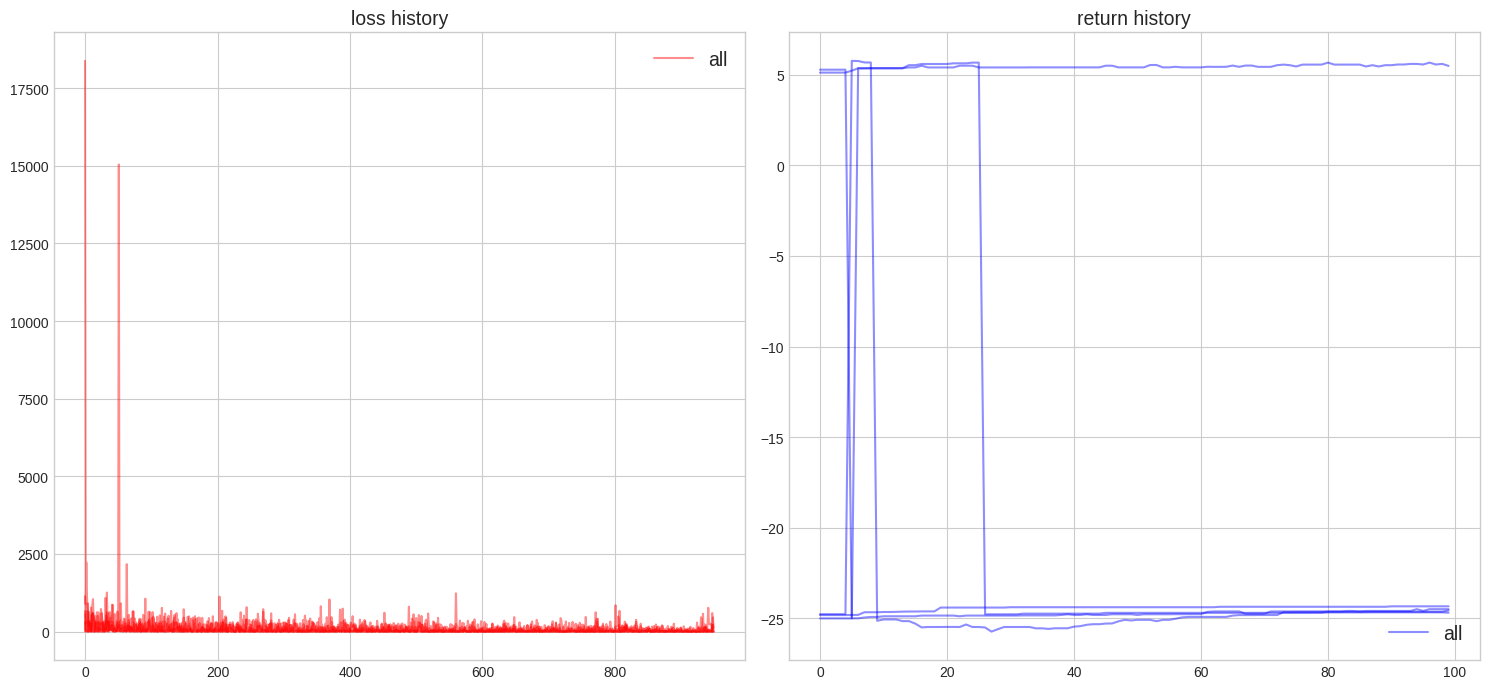

acquired action
action =  [7.908 7.908 7.908 7.908 7.908 7.908 7.908 7.908 7.908 7.908]
action =  [9.157 9.157 9.157 9.157 9.157 9.157 9.157 9.157 9.157 9.157]
action =  [9.337 9.337 9.337 9.337 9.337 9.337 9.337 9.337 9.337 9.337]
action =  [8.866 8.866 8.866 8.866 8.866 8.866 8.866 8.866 8.866 8.866]
action =  [9.412 9.412 9.412 9.412 9.412 9.412 9.412 9.412 9.412 9.412]
action =  [8.513 8.513 8.513 8.513 8.513 8.513 8.513 8.513 8.513 8.513]
action =  [9.629 9.629 9.629 9.629 9.629 9.629 9.629 9.629 9.629 9.629]
action =  [9.809 9.809 9.809 9.809 9.809 9.809 9.809 9.809 9.809 9.809]
action =  [9.053 9.053 9.053 9.053 9.053 9.053 9.053 9.053 9.053 9.053]
action =  [6.321 6.321 6.321 6.321 6.321 6.321 6.321 6.321 6.321 6.321]
return [-24.342 -24.342 -24.342 -24.342 -24.342 -24.342 -24.342 -24.342 -24.342
 -24.342]
param distribution in model


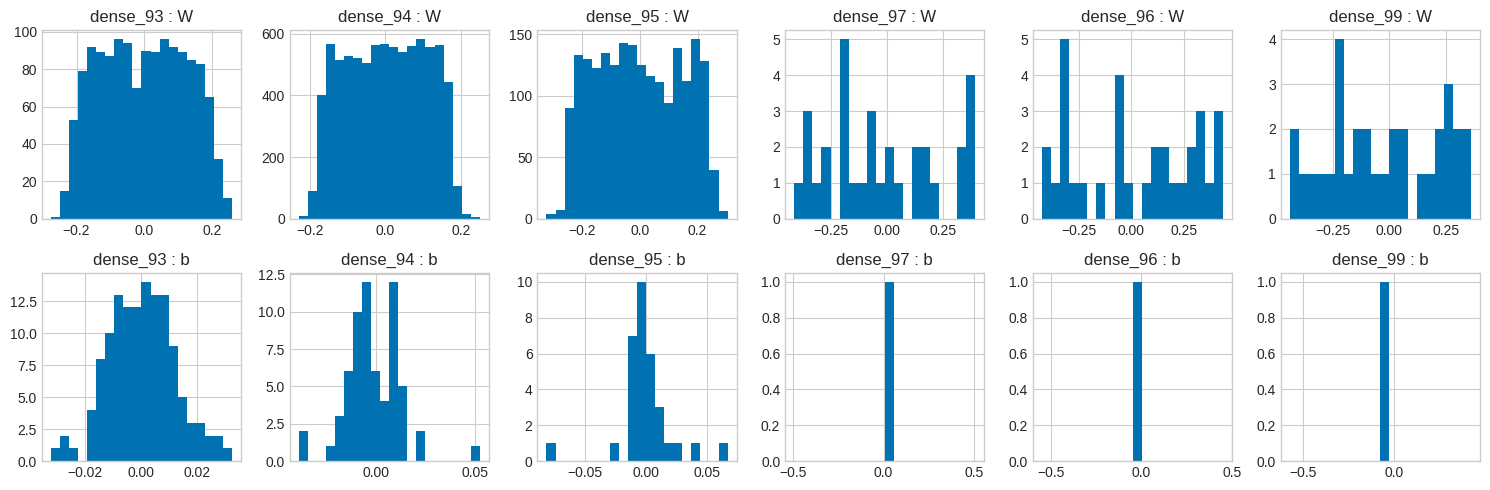

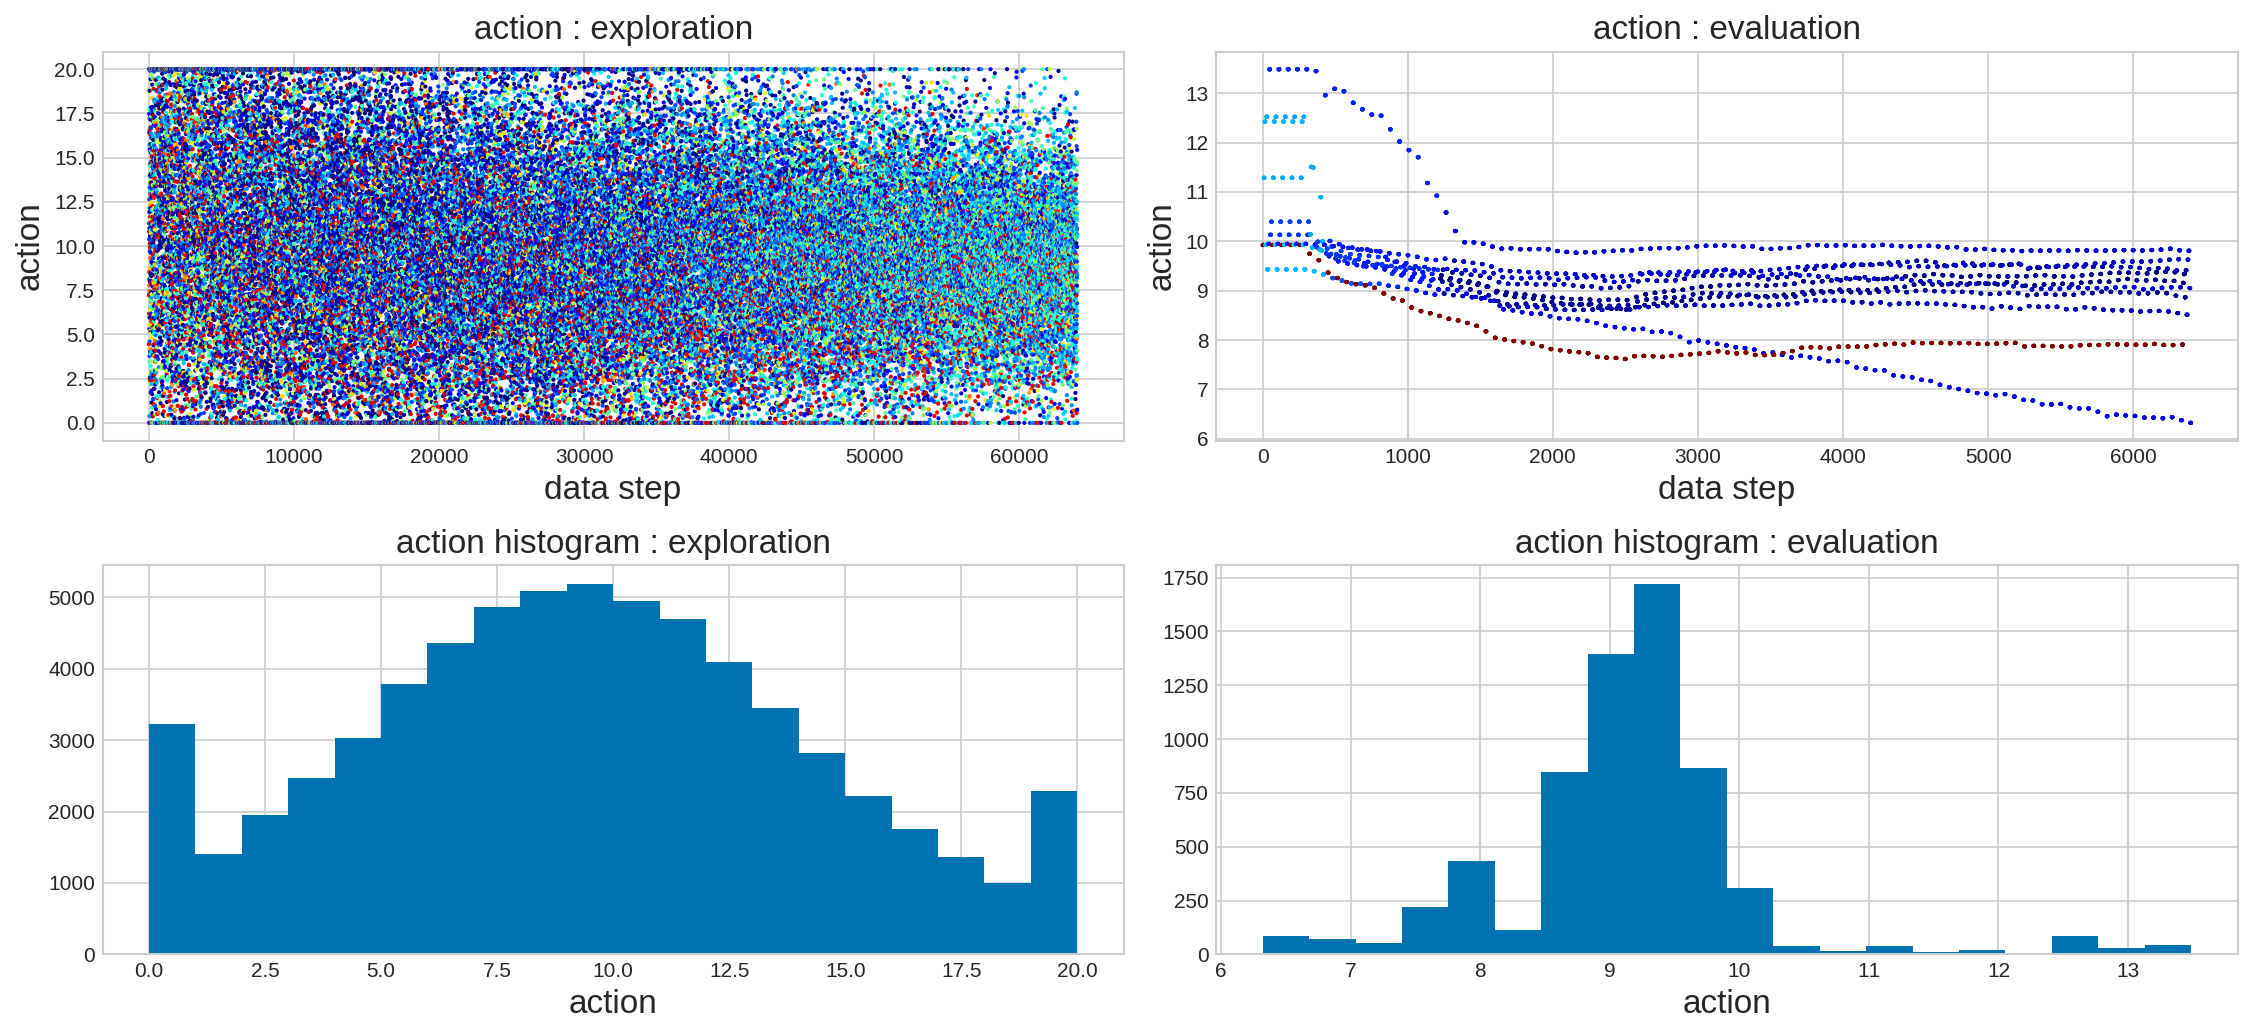

bankrupt=340424, total=352064, ratio=0.9669


In [10]:
import NAF
importlib.reload(NAF)

from keras import optimizers
np.set_printoptions(precision=3)  # 数値桁数を指定．

action_min = mu_min
action_max = mu_max
sigma = (action_max - action_min) / 3

model_gen_func = lambda : NAF.gen_model(input_shapes=env.shapes(), n_actions=1, 
                     hidden_dims=[128, 64, 32], reg_l1=0.0, reg_l2=0.0, 
                     input_reg=False, input_min=0, input_max=10, 
                     action_reg=True, action_min=action_min, action_max=action_max,
                     value_reg=False, value_min=0, value_max=10)
model = model_gen_func()

#df = pd.DataFrame()
for lr, sigma_end in itertools.product(
    [1e-4,], [0.5,]):
    print('======================================================')
    print('lr={}, sigma_end={}'
          .format(lr, sigma_end))
    
    tester = NAF.Tester(env, model, val_min=action_min, val_max=action_max, 
                        model_gen_func=model_gen_func)
    #n_trials = 5
    #n_steps = 10000
    tester.test(n_trials=n_trials, 
                n_steps=n_steps, training_interval=10, n_batches=10, batch_size=128,
                alpha=1.0, target_update_interval=20,
                gamma=1.0/(1+hurdle),
                optimizer=optimizers.Adam(lr), 
                sigma_start=sigma, sigma_end=sigma * sigma_end, sigma_interval=n_steps,
                verbose=False, verbose_interval=100, evaluate_interval=100, 
                get_log=True)
    
    viz = NAF.Visualizer()
    viz.viz_action_history(tester.trainer, state_valuation=lambda x:x[0], action_valuation=lambda x:x, 
                           cmap='jet', alpha=1.0, s=1.0)
    
    for trial in range(n_trials):
        df_temp = pd.DataFrame(np.ravel(tester.return_histories[trial]['all']), columns=['return'])
        df_temp['trial'] = trial
        df_temp['t'] = np.arange(len(df_temp))
        #df_temp['lr'] = lr
        #df_temp['sigma_end'] = sigma_end
        df_temp['Agent'] = 'NAF'

        df = pd.concat([df, df_temp])

    #ModelInspection.inspect_hidden_layers(tester.env, tester.model, tester.agent, show_hidden_hist=True)
    print('bankrupt={}, total={}, ratio={:.4f}'
      .format(env.done_bankrupt_counter, env.done_counter, env.done_bankrupt_counter/env.done_counter))
    env.done_counter = 0
    env.done_bankrupt_counter = 0

df.to_csv(tester.name + '.csv')

lr=0.0001, mult_critic=1.0, mult_entropy=1e-05
start testing... :  2019-11-02 00:04:15.604964
start 0/5 th trial...


100%|██████████| 10000/10000 [01:35<00:00, 104.80it/s]


start 1/5 th trial...


100%|██████████| 10000/10000 [01:27<00:00, 113.92it/s]


start 2/5 th trial...


100%|██████████| 10000/10000 [01:36<00:00, 103.74it/s]


start 3/5 th trial...


100%|██████████| 10000/10000 [01:29<00:00, 111.87it/s]


start 4/5 th trial...


100%|██████████| 10000/10000 [01:30<00:00, 110.15it/s]


end testing... :  2019-11-02 00:12:07.431611
loss and reward history


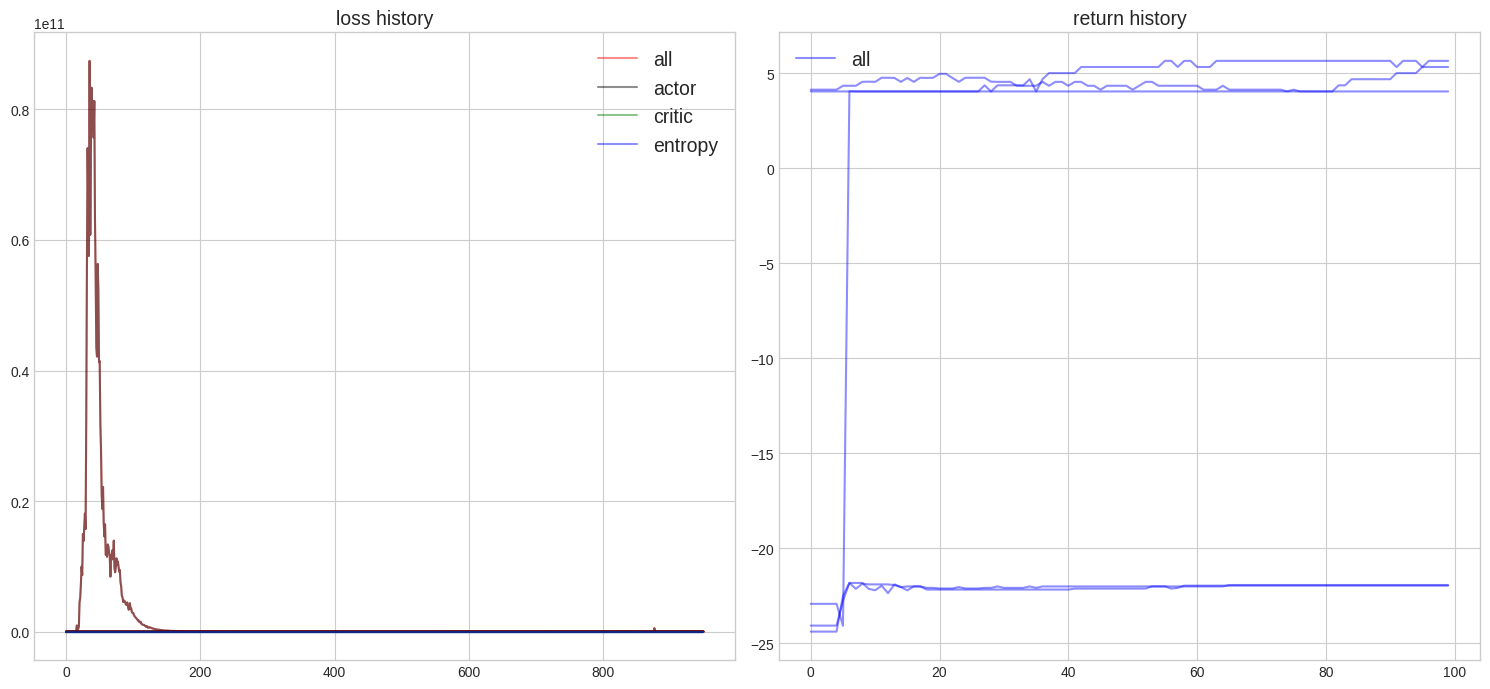

acquired action
action =  [10.393 10.393 10.393 10.393 10.393 10.393 10.393 10.393 10.393 10.393]
action =  [18.834 18.834 18.834 18.834 18.834 18.834 18.834 18.834 18.834 18.834]
action =  [17.915 17.915 17.915 17.915 17.915 17.915 17.915 17.915 17.915 17.915]
action =  [18.257 18.257 18.257 18.257 18.257 18.257 18.257 18.257 18.257 18.257]
action =  [19.74 19.74 19.74 19.74 19.74 19.74 19.74 19.74 19.74 19.74]
action =  [18.957 18.957 18.957 18.957 18.957 18.957 18.957 18.957 18.957 18.957]
action =  [18.816 18.816 18.816 18.816 18.816 18.816 18.816 18.816 18.816 18.816]
action =  [17.631 17.631 17.631 17.631 17.631 17.631 17.631 17.631 17.631 17.631]
action =  [19.396 19.396 19.396 19.396 19.396 19.396 19.396 19.396 19.396 19.396]
action =  [19.214 19.214 19.214 19.214 19.214 19.214 19.214 19.214 19.214 19.214]
return [5.642 5.642 5.642 5.642 5.642 5.642 5.642 5.642 5.642 5.642]
param distribution in model


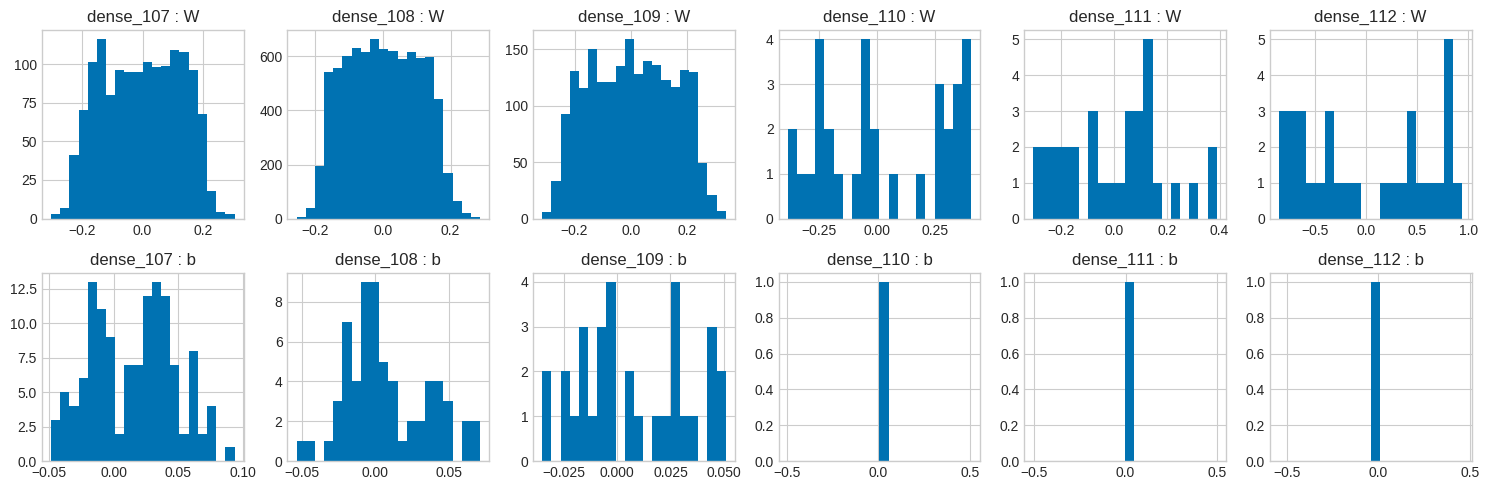

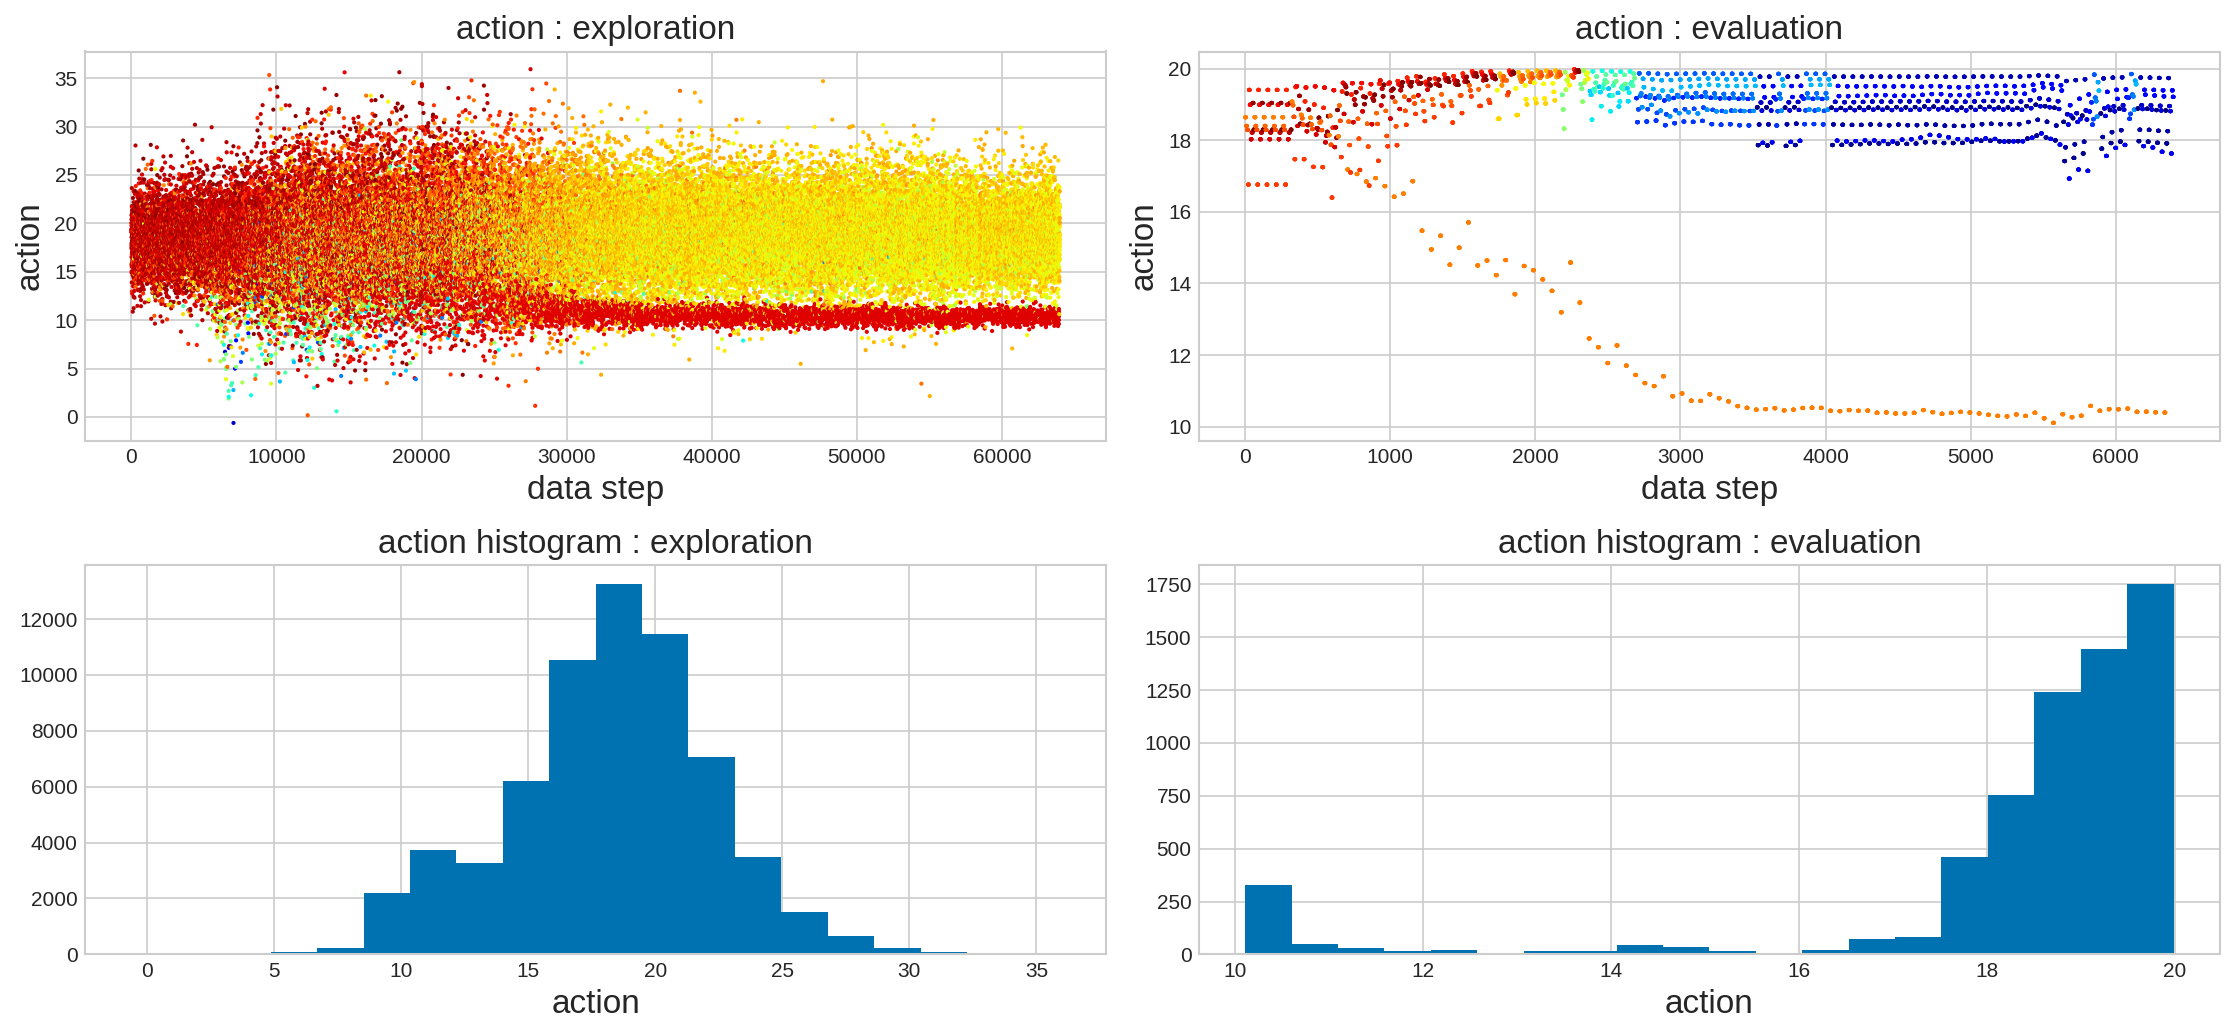

bankrupt=212197, total=382593, ratio=0.5546


In [11]:
import AWR
importlib.reload(AWR)  # original DRL code

from keras import optimizers

mu_min = mu_min
mu_max = mu_max
sigma_max = (mu_max - mu_min) / 3

model = AWR.gen_model(input_shapes=env.shapes(), n_outputs=1, \
                      hidden_dims=[128, 64, 32], reg_l1=1e-6, reg_l2=1e-6, \
                      state_reg=False, state_min=-1.0, state_max=1.0,
                      action_reg=True, 
                      action_min=mu_min, action_max=mu_max, 
                      action_sigma_min=0.0001, action_sigma_max=sigma_max, 
                      value_reg=False, value_min=0, value_max=1)

#df = pd.DataFrame()
for lr, mult_critic, mult_entropy in itertools.product(
    [1e-4,], [1.0,], [1e-5,]):
    print('======================================================')
    print('lr={}, mult_critic={}, mult_entropy={}'
          .format(lr, mult_critic, mult_entropy))
    
    tester = AWR.Tester(env, model, 
                        action_min=mu_min-3*sigma_max, 
                        action_max=mu_max+3*sigma_max)
    #n_trials = 1
    #n_steps = 10000
    tester.test(n_trials=n_trials, n_steps=n_steps, 
                training_interval=10, n_batches=10, batch_size=256,
                buf_alpha=0.5, buf_beta=0.5, buf_mode='rank',
                gamma=1.0/(1+hurdle), 
                optimizer=optimizers.Adam(lr=lr),
                mult_actor=1.0, mult_critic=mult_critic, mult_entropy=mult_entropy, mult_beta=1.0, 
                verbose=False, verbose_interval=100, evaluate_interval=100, 
                get_log=True)

    viz = AWR.Visualizer()
    viz.viz_action_history(tester.trainer, state_valuation=lambda x:x[0], action_valuation=lambda x:x, 
                           cmap='jet', alpha=1.0, s=1.0)

    for trial in range(n_trials):
        df_temp = pd.DataFrame(np.ravel(tester.return_histories[trial]['all']), columns=['return'])
        df_temp['trial'] = trial
        df_temp['t'] = np.arange(len(df_temp))
        #df_temp['lr'] = lr
        #df_temp['mult_critic'] = mult_critic
        #df_temp['mult_entropy'] = mult_entropy
        df_temp['Agent'] = 'AWR'

        df = pd.concat([df, df_temp])

    #ModelInspection.inspect_hidden_layers(tester.env, tester.model, tester.agent, show_hidden_hist=True)
    print('bankrupt={}, total={}, ratio={:.4f}'
      .format(env.done_bankrupt_counter, env.done_counter, env.done_bankrupt_counter/env.done_counter))
    env.done_counter = 0
    env.done_bankrupt_counter = 0

df.to_csv(tester.name + '.csv')

In [12]:
env = Env_Reserve.Environment(cashflow=cashflow, 
                              interest=interest, hurdle=hurdle, 
                              initial_cash=initial_cash, bankrupt_penalty=bankrupt_penalty, 
                              bankrupt_info=bankrupt_info, 
                              n_agents=1)

  0%|          | 0/1000 [00:00<?, ?it/s]

lr=0.01, eps=0.01
start testing... :  2019-11-02 00:12:12.164185
start trial 0/5 trial...


  0%|          | 0/1000 [00:00<?, ?it/s]

start trial 1/5 trial...


  0%|          | 0/1000 [00:00<?, ?it/s]

start trial 2/5 trial...


  0%|          | 0/1000 [00:00<?, ?it/s]

start trial 3/5 trial...


  0%|          | 0/1000 [00:00<?, ?it/s]

start trial 4/5 trial...


100%|██████████| 1000/1000 [22:04<00:00,  1.32s/it]


end testing... :  2019-11-02 02:02:47.269190
loss and reward history


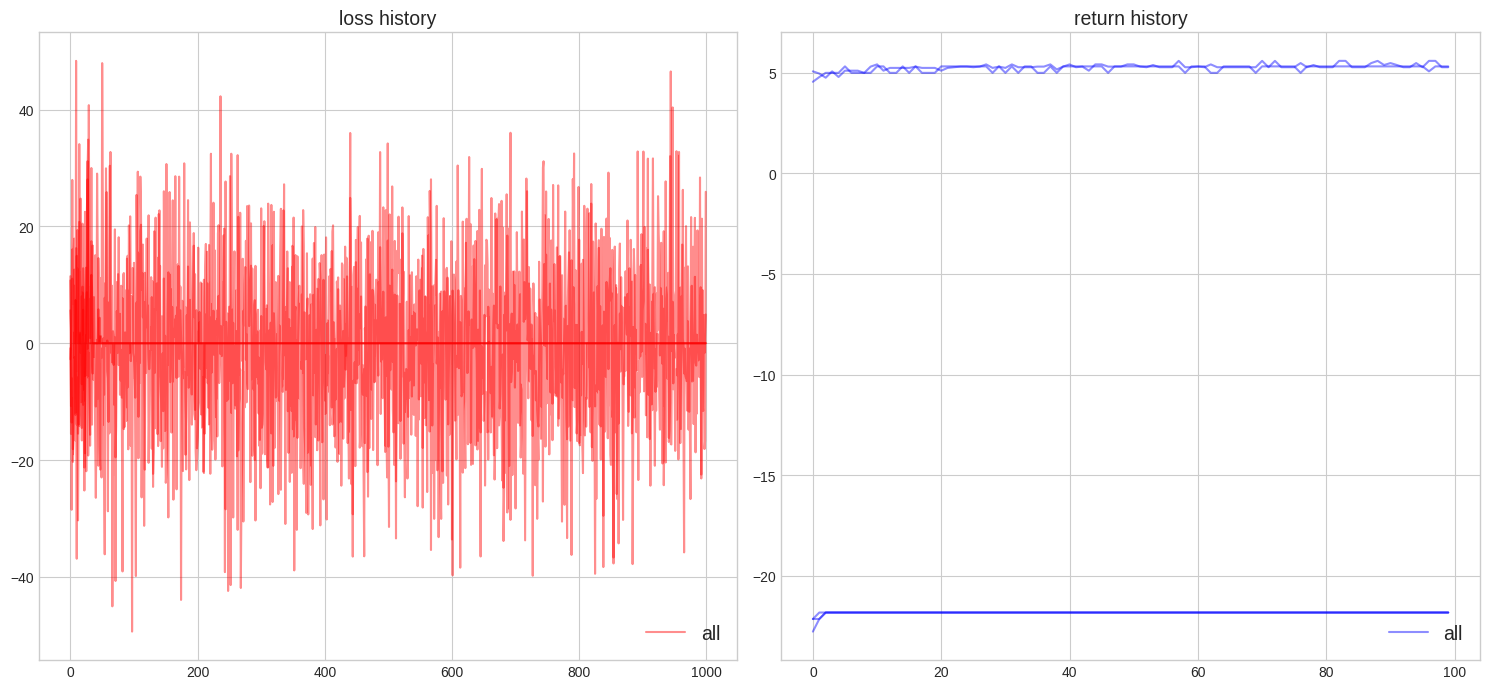

acquired action
action =  [11.126]
action =  [15.735]
action =  [14.574]
action =  [12.492]
action =  [12.497]
action =  [13.455]
action =  [13.395]
action =  [13.489]
action =  [13.466]
action =  [18.606]
total_reward [5.32]
param distribution in model


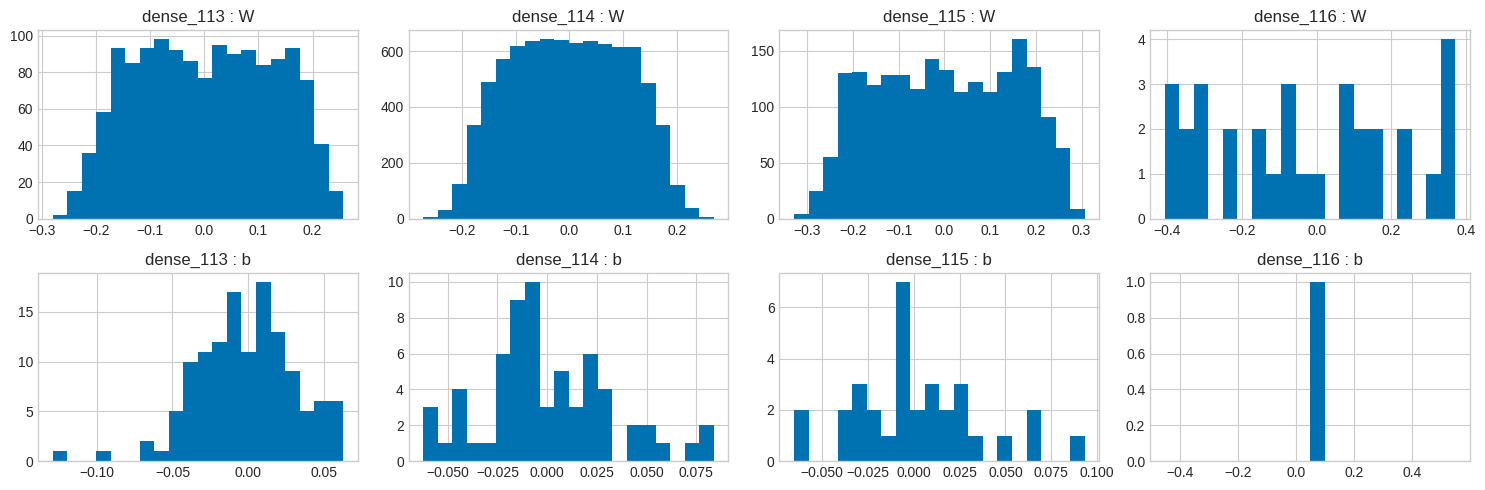

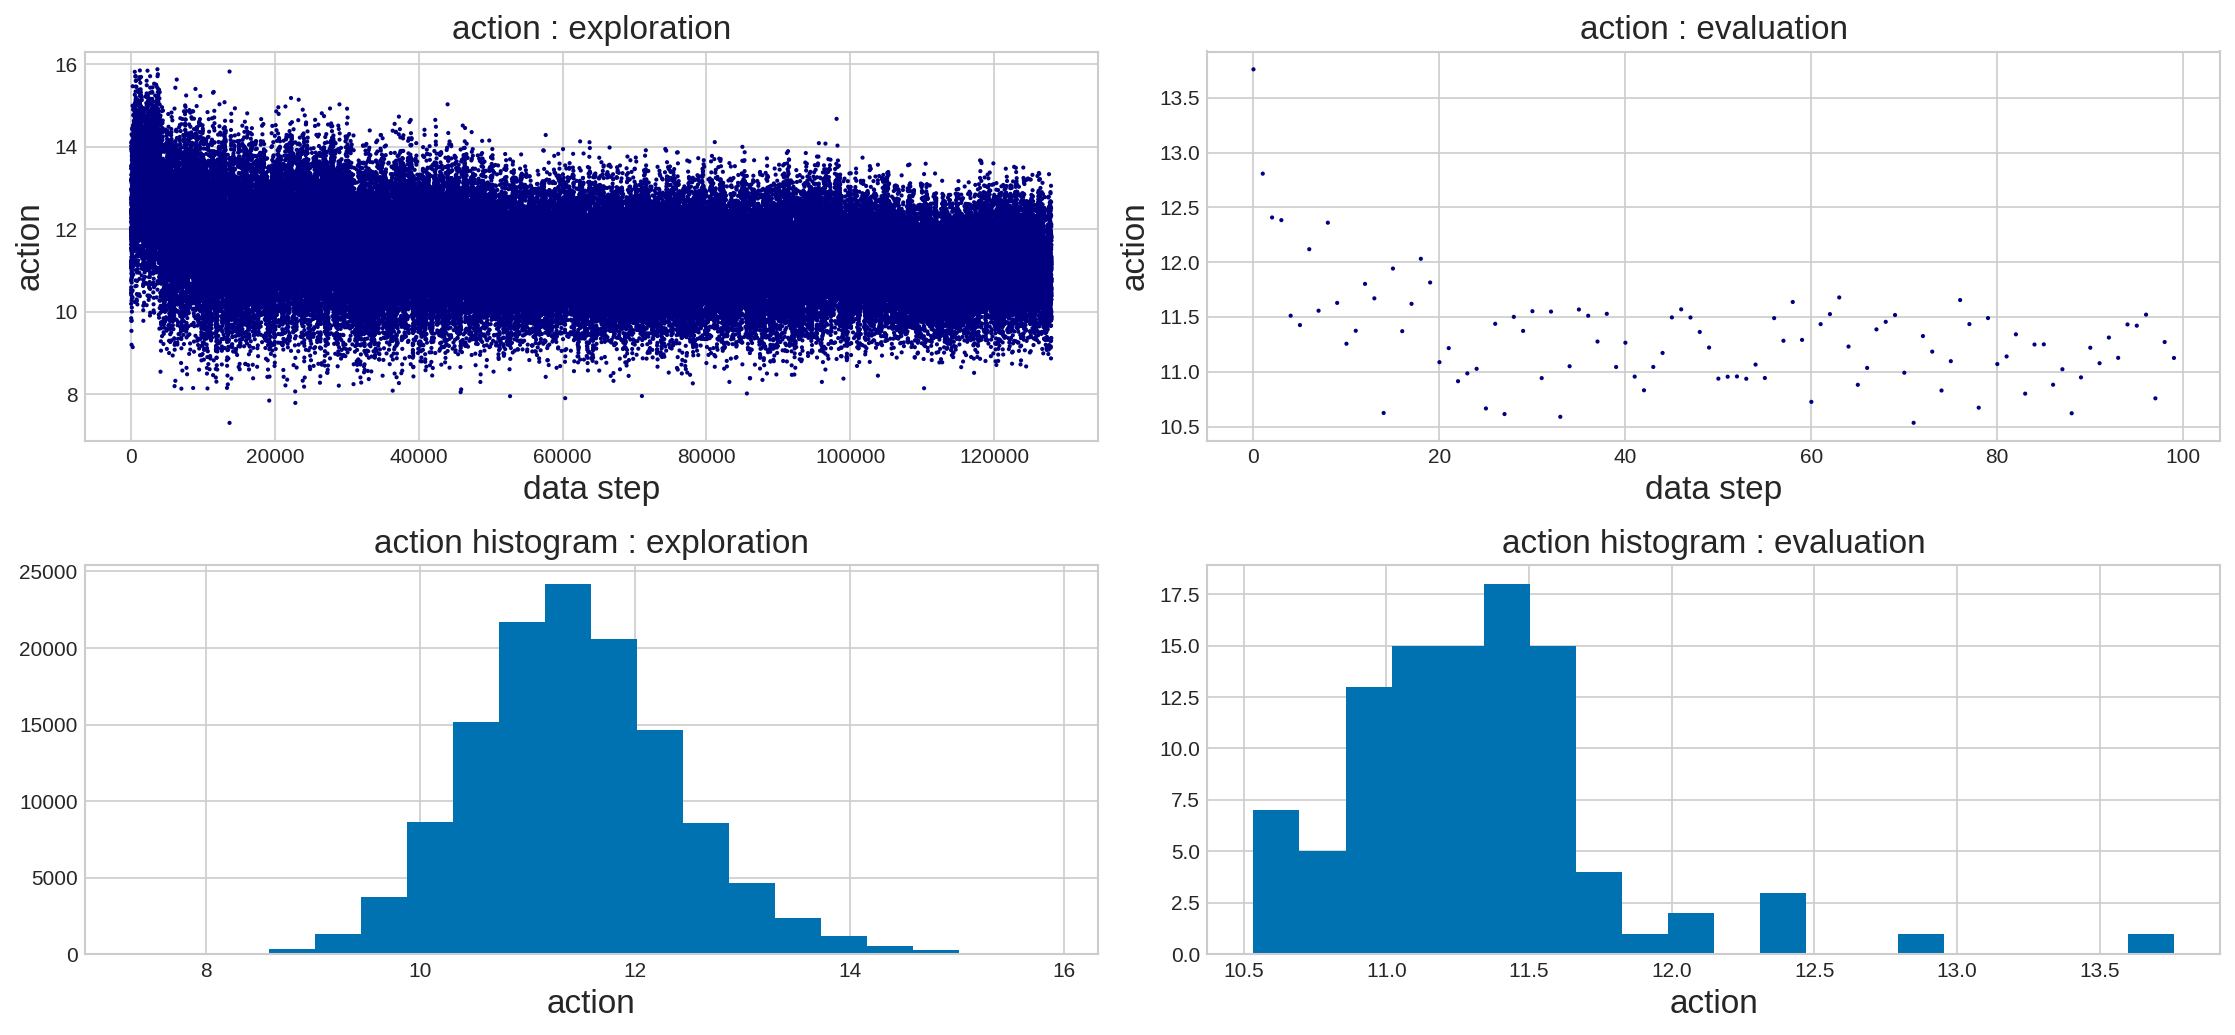

bankrupt=390085, total=640501, ratio=0.6090


In [13]:
import ES
importlib.reload(ES)
from keras import optimizers

action_min = mu_min
action_max = mu_max

model = ES.gen_model(input_shapes=env.shapes(), n_outputs=1, \
                     hidden_dims=[128, 64, 32], reg_l1=0.0, reg_l2=0.0, \
                     action_min=action_min, action_max=action_max)

#df = pd.DataFrame()
for lr, eps in itertools.product([1e-2], [1e-2]):
    print('======================================================')
    print('lr={}, eps={}'
          .format(lr, eps))
    tester = ES.Tester(env, model, name='ES_01')
    #n_trials = 3
    #n_steps = 10000
    tester.test(n_trials=n_trials, n_episodes=n_steps // 10, n_samples=64,
                gamma=1.0/(1+hurdle),
                learning_rate_start=lr, learning_rate_end=lr, learning_rate_interval=100,
                epsilon_start=eps, epsilon_end=eps, epsilon_interval=100,
                verbose=False, verbose_interval=100//10, evaluate_interval=100//10, 
                get_log=True)
    
    viz = ES.Visualizer()
    viz.viz_action_history(tester.trainer, state_valuation=lambda x:x[0], action_valuation=lambda x:x,
                       data_span=10,
                       cmap='jet', alpha=1.0, s=1.0)
    
    for trial in range(n_trials):
        df_temp = pd.DataFrame(np.ravel(tester.return_histories[trial]['all']), columns=['return'])
        df_temp['trial'] = trial
        df_temp['t'] = np.arange(len(df_temp))
        #df_temp['lr'] = lr
        #df_temp['eps'] = eps
        df_temp['Agent'] = 'ES'

        df = pd.concat([df, df_temp])

    #ModelInspection.inspect_hidden_layers(tester.env, tester.model, tester.agent, show_hidden_hist=True)
    print('bankrupt={}, total={}, ratio={:.4f}'
      .format(env.done_bankrupt_counter, env.done_counter, env.done_bankrupt_counter/env.done_counter))
    env.done_counter = 0
    env.done_bankrupt_counter = 0

df.to_csv(tester.name + '.csv')

er=0.5, eps=0.1
start testing... :  2019-11-02 02:02:52.219184
start trial 0/5 trial...


100%|██████████| 1000/1000 [21:55<00:00,  1.33s/it]


start trial 1/5 trial...


100%|██████████| 1000/1000 [22:06<00:00,  1.32s/it]


start trial 2/5 trial...


100%|██████████| 1000/1000 [22:10<00:00,  1.32s/it]


start trial 3/5 trial...


100%|██████████| 1000/1000 [22:07<00:00,  1.33s/it]


start trial 4/5 trial...


100%|██████████| 1000/1000 [22:08<00:00,  1.33s/it]


end testing... :  2019-11-02 03:54:24.031586
loss and reward history


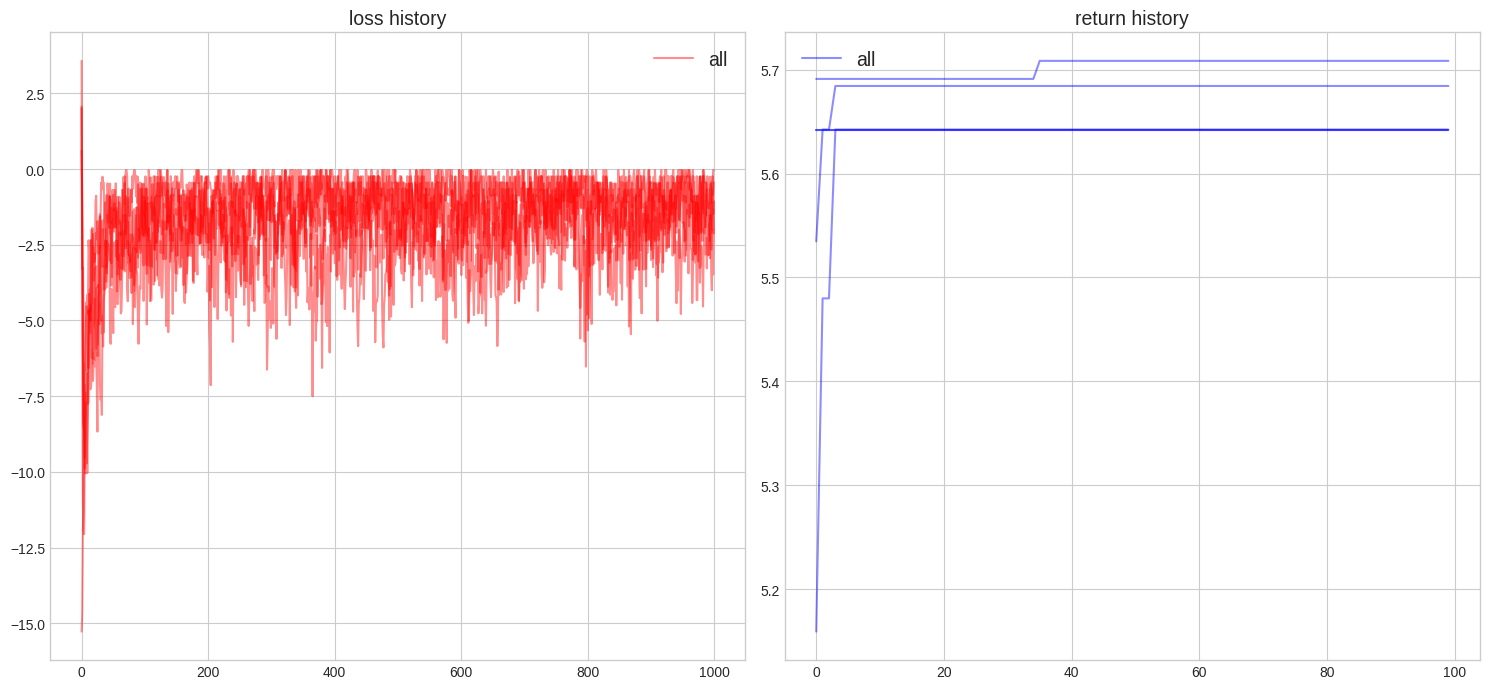

acquired action
action =  [9.808]
action =  [18.73]
action =  [13.958]
action =  [19.876]
action =  [17.813]
action =  [12.654]
action =  [10.447]
action =  [18.798]
action =  [18.031]
action =  [11.828]
total_reward [5.708]
param distribution in model


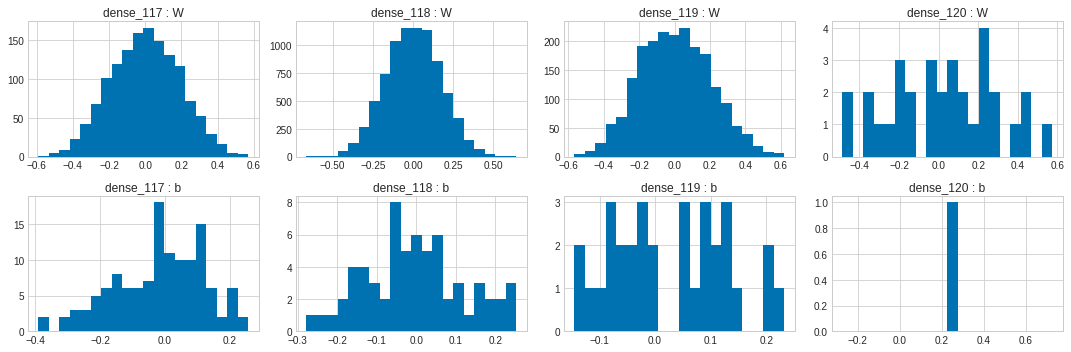

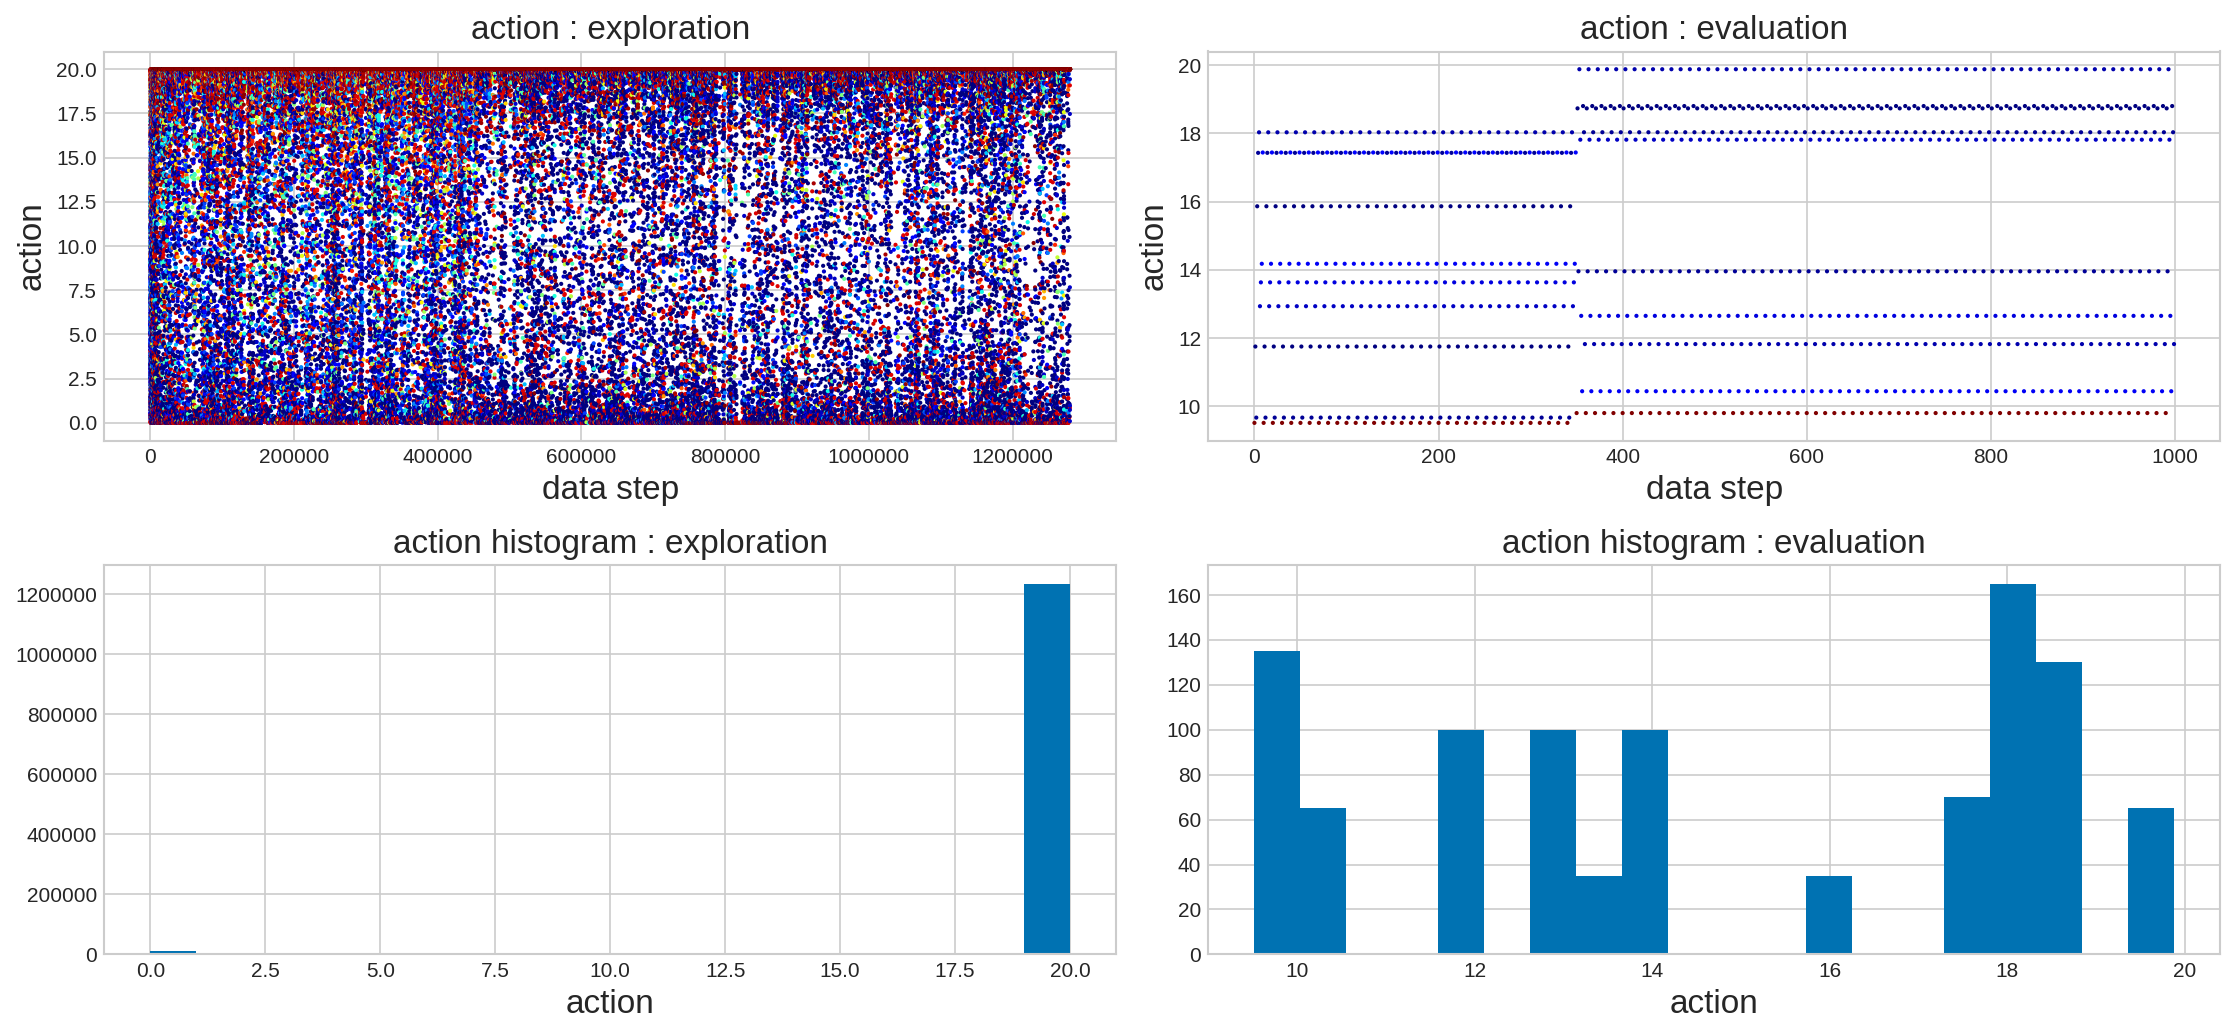

bankrupt=40734, total=640506, ratio=0.0636


In [14]:
import GA
importlib.reload(GA)
from keras import optimizers

action_min = mu_min
action_max = mu_max

model = GA.gen_model(input_shapes=env.shapes(), n_outputs=1, \
                     hidden_dims=[128, 64, 32], reg_l1=0.0, reg_l2=0.0, \
                     action_min=action_min, action_max=action_max)

#df = pd.DataFrame()
for er, eps in itertools.product([0.5], [0.1]):
    print('======================================================')
    print('er={}, eps={}'
          .format(er, eps))
    tester = GA.Tester(env, model, name='GA_01')
    #n_trials = 3
    #n_steps = 10000
    tester.test(n_trials=n_trials, n_episodes=n_steps // 10, 
                n_samples=64, ratio_elite=er, 
                gamma=1.0/(1+hurdle),
                epsilon_start=eps, epsilon_end=eps, epsilon_interval=100,
                verbose=False, verbose_interval=100//10, evaluate_interval=100//10, 
                get_log=True)
    
    viz = GA.Visualizer()
    viz.viz_action_history(tester.trainer, state_valuation=lambda x:x[0], action_valuation=lambda x:x,
                       data_span=1,
                       cmap='jet', alpha=1.0, s=1.0)
    
    for trial in range(n_trials):
        df_temp = pd.DataFrame(np.ravel(tester.return_histories[trial]['all']), columns=['return'])
        df_temp['trial'] = trial
        df_temp['t'] = np.arange(len(df_temp))
        #df_temp['er'] = er
        #df_temp['eps'] = eps
        df_temp['Agent'] = 'GA'

        df = pd.concat([df, df_temp])

    #ModelInspection.inspect_hidden_layers(tester.env, tester.model, tester.agent, show_hidden_hist=True)
    print('bankrupt={}, total={}, ratio={:.4f}'
      .format(env.done_bankrupt_counter, env.done_counter, env.done_bankrupt_counter/env.done_counter))
    env.done_counter = 0
    env.done_bankrupt_counter = 0

df.to_csv(tester.name + '.csv')

---
## 3. Results

In [15]:
pd.options.display.precision = 4
ids = ['Agent',]
df[df['t'].max()*0.9<=df['t']].groupby(ids)['return'].describe()

count     mean         std      min      25%      50%  \
Agent                                                                   
A2C_continuous   50.0  -1.1588  1.0489e+01 -21.9491   4.0330   4.0330   
A2C_discrete     50.0  -5.5895  1.4039e+01 -23.0703 -22.1437   5.7502   
AWR              50.0  -5.8367  1.3309e+01 -21.9776 -21.9441   4.0330   
DDPG             50.0 -21.8348  3.5888e-15 -21.8348 -21.8348 -21.8348   
DQN              50.0   0.9990  8.5296e+00 -21.9843   4.0330   4.0921   
ES               50.0 -10.9629  1.3451e+01 -21.8348 -21.8348 -21.8348   
GA               50.0   5.6639  2.7807e-02   5.6423   5.6423   5.6423   
NAF              50.0 -18.5242  1.2174e+01 -24.6965 -24.6399 -24.5336   

                    75%      max  
Agent                             
A2C_continuous   4.0330   4.0330  
A2C_discrete     5.7618   5.7722  
AWR              5.3204   5.6423  
DDPG           -21.8348 -21.8348  
DQN              4.1152   4.3102  
ES               5.3204   5.5946  
GA               5.6842   5.7083  
NAF            -24.3421   5.6732

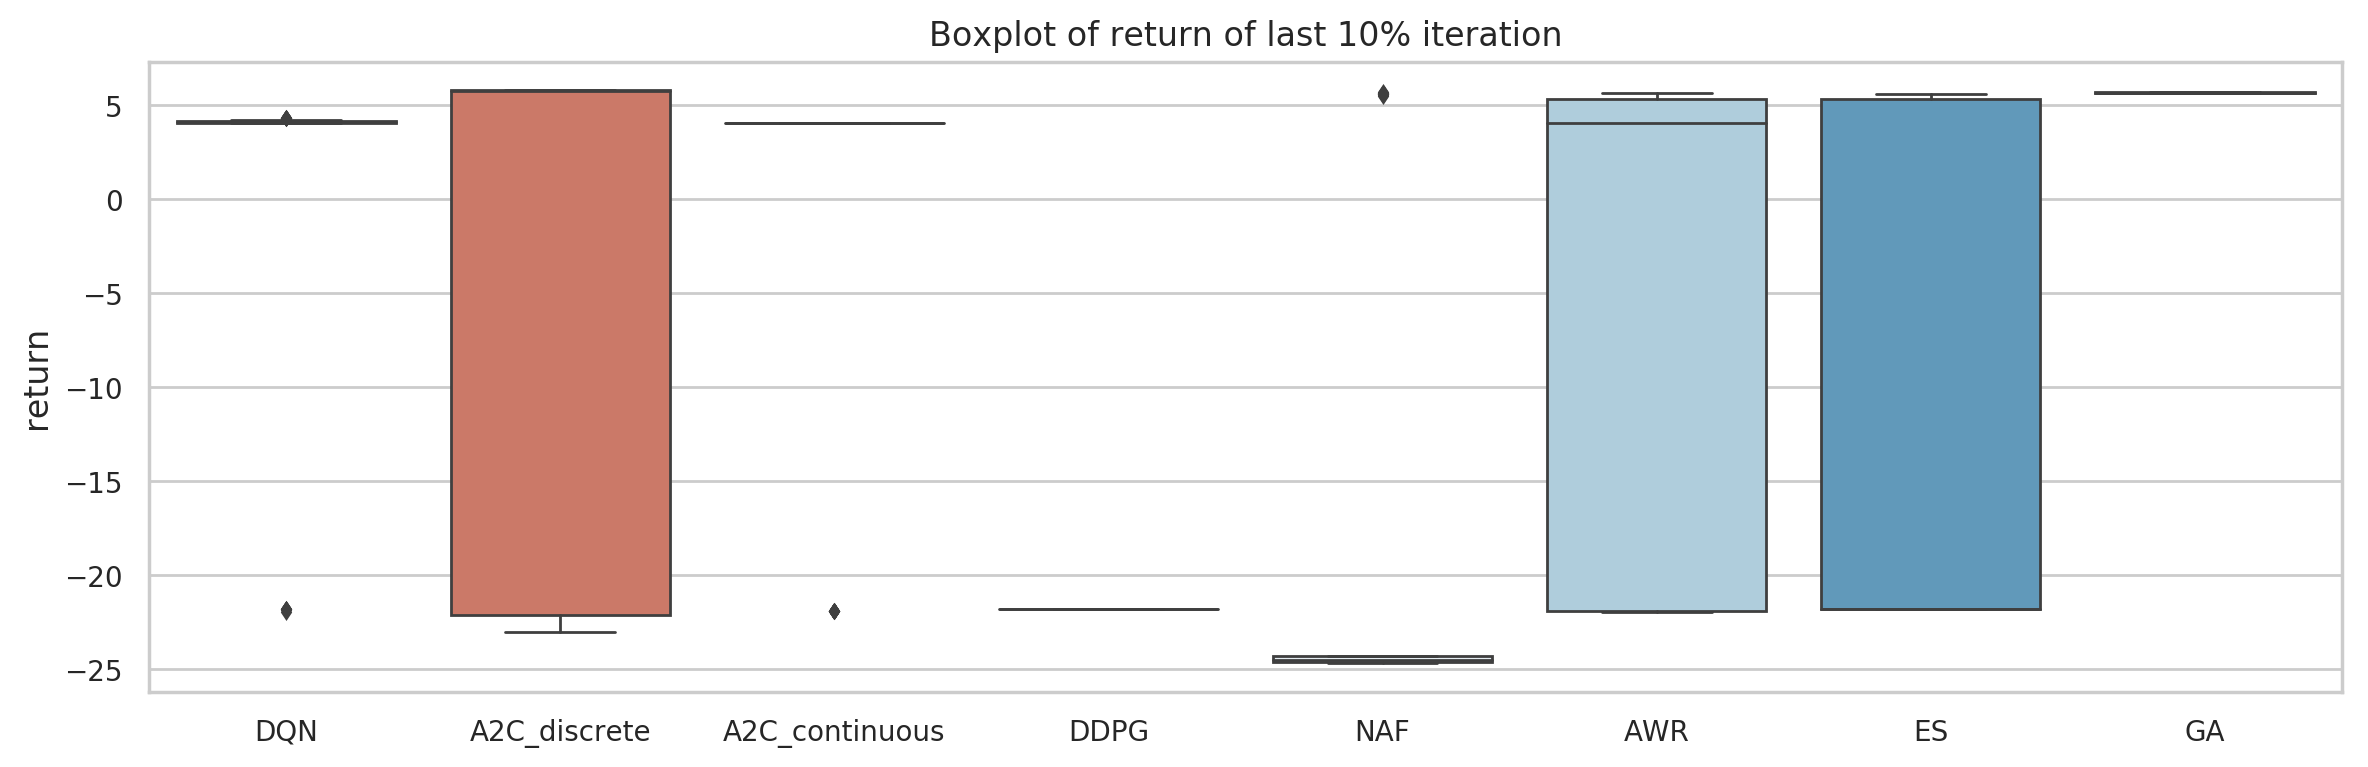

In [16]:
sns.set_style("whitegrid")
sns.set_context("notebook")

plt.figure(figsize=(12, 4), dpi=200)

sns.boxplot(data=df[df['t'].max()*0.9<=df['t']], x='Agent', y='return', orient='v', fliersize=3.0, linewidth=1.0, palette='RdBu')

plt.title('Boxplot of return of last 10% iteration', fontsize=12)
plt.xlabel('', fontsize=12)
plt.ylabel('return', fontsize=12)
plt.tick_params(labelsize=10)

plt.tight_layout()
plt.show()

/home/deepstation/.pyenv/versions/anaconda3-5.0.1/envs/ForChainer/lib/python3.6/site-packages/scipy/stats/stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


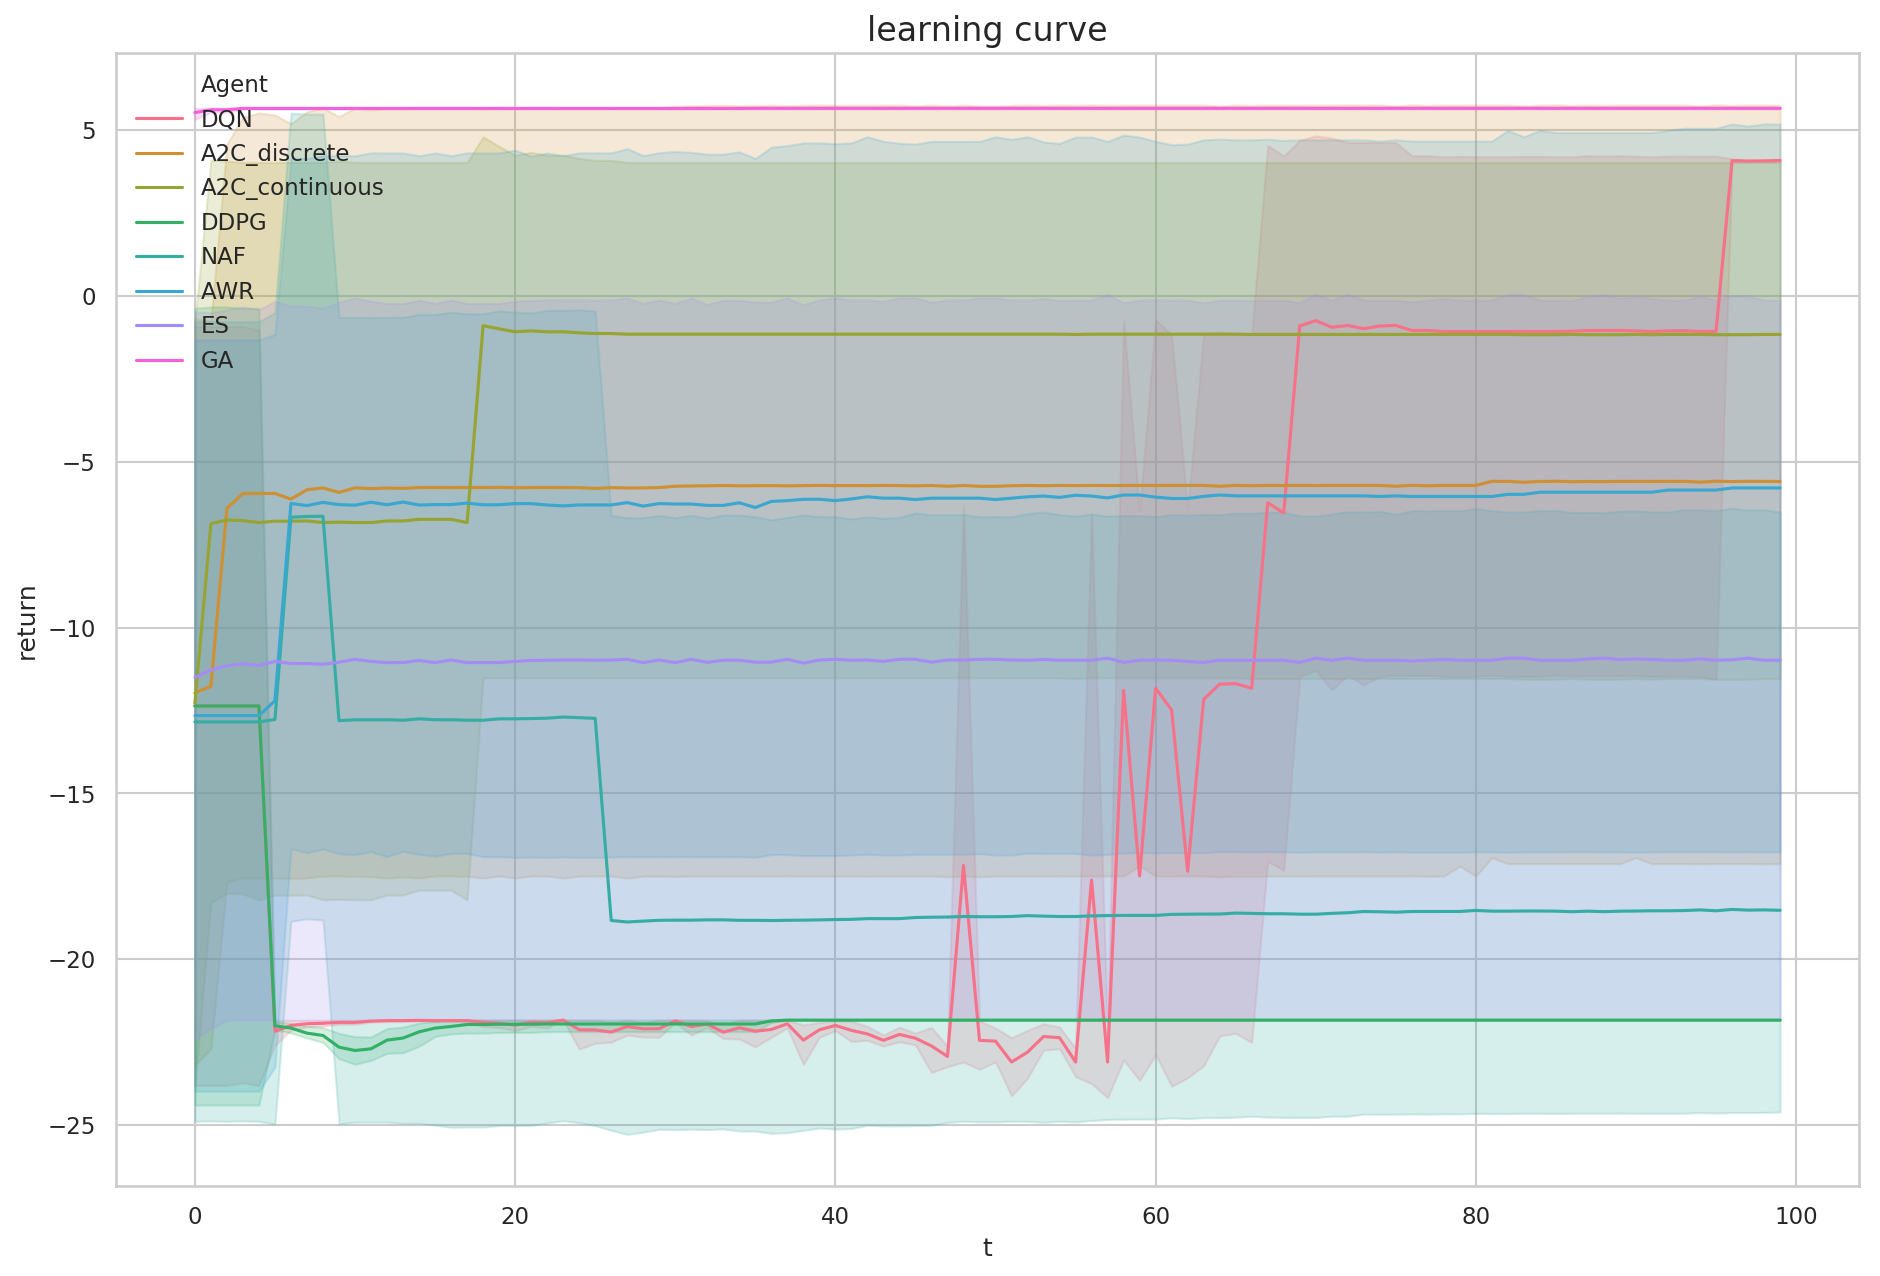

In [17]:
fig = plt.figure(figsize=(15, 10), dpi=150)
sns.lineplot(x='t', y='return', hue='Agent', data=df)
plt.title('learning curve', size=16)
plt.show()